In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import matplotlib.cm as cm

Found 48 shared images.


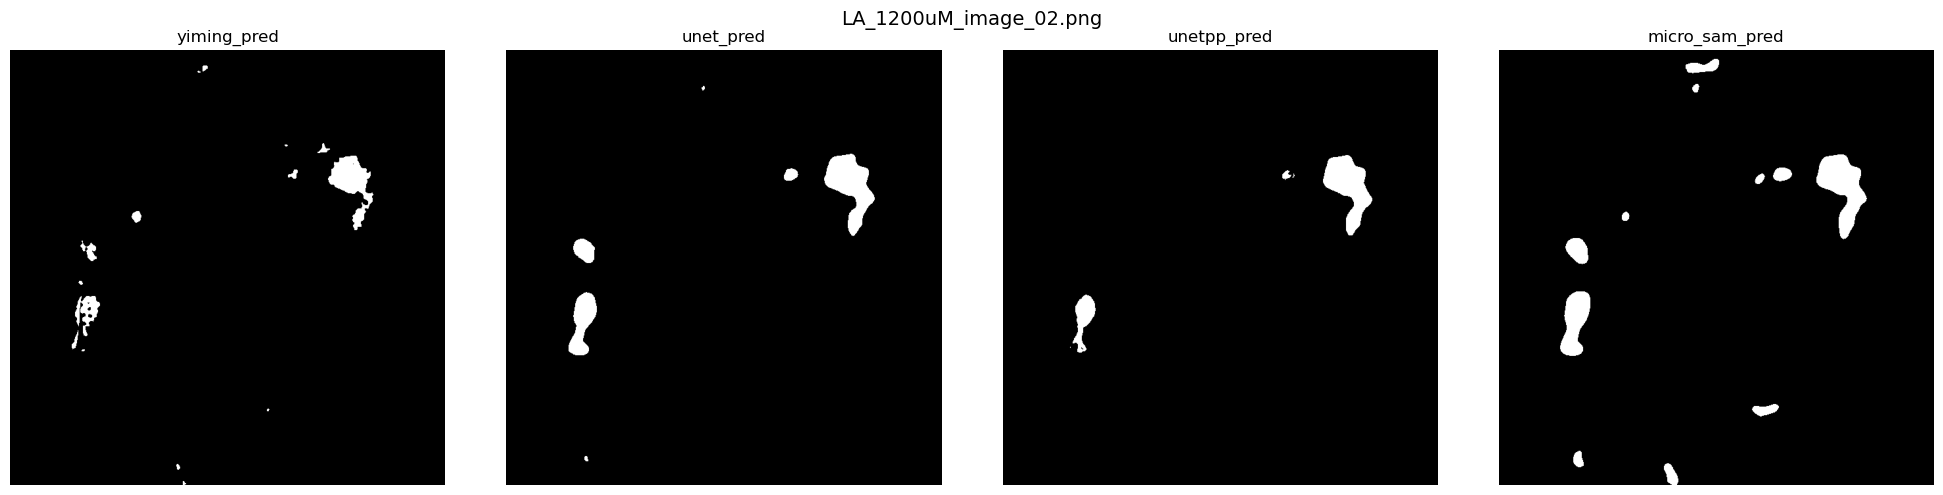

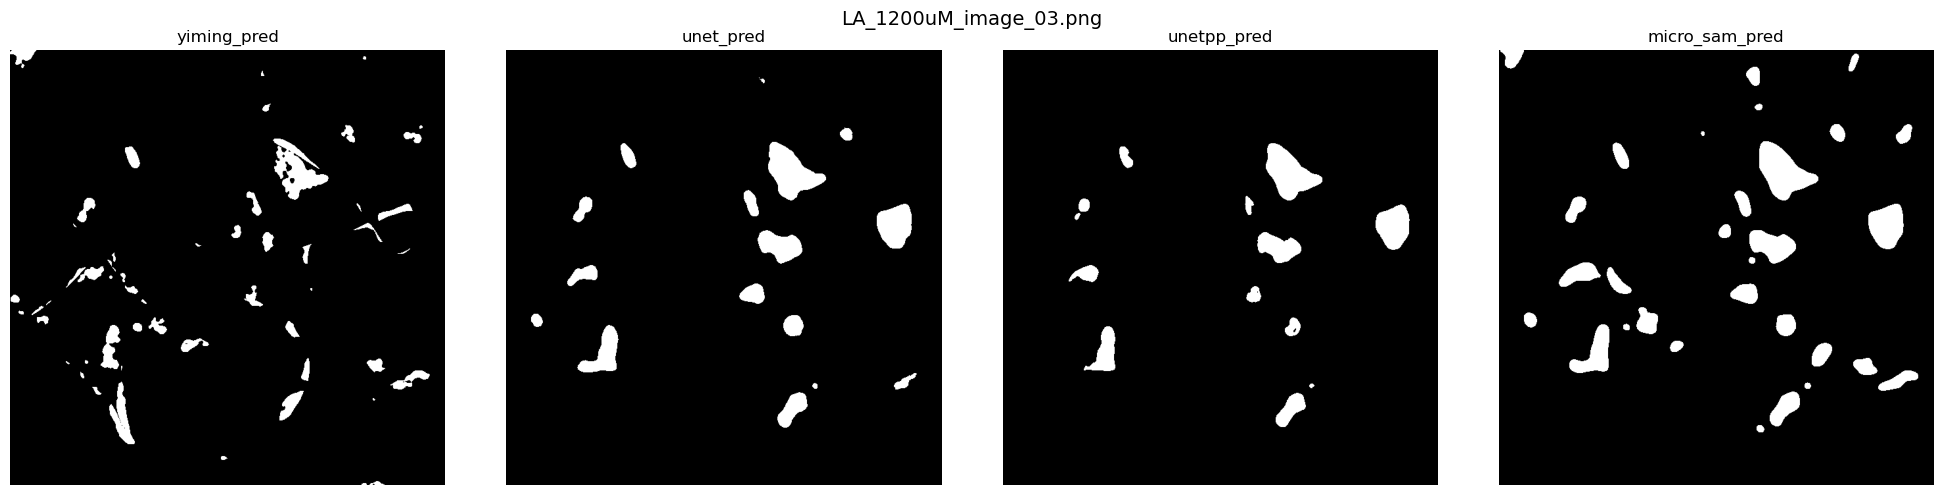

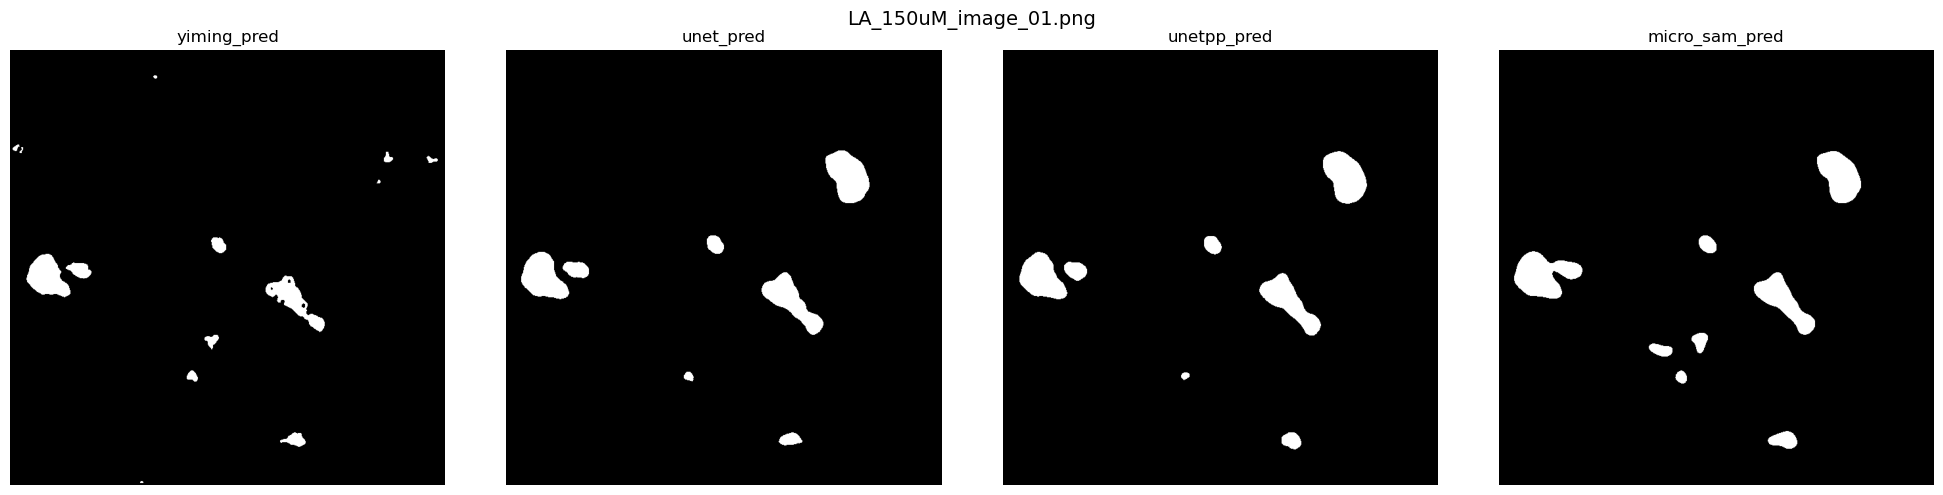

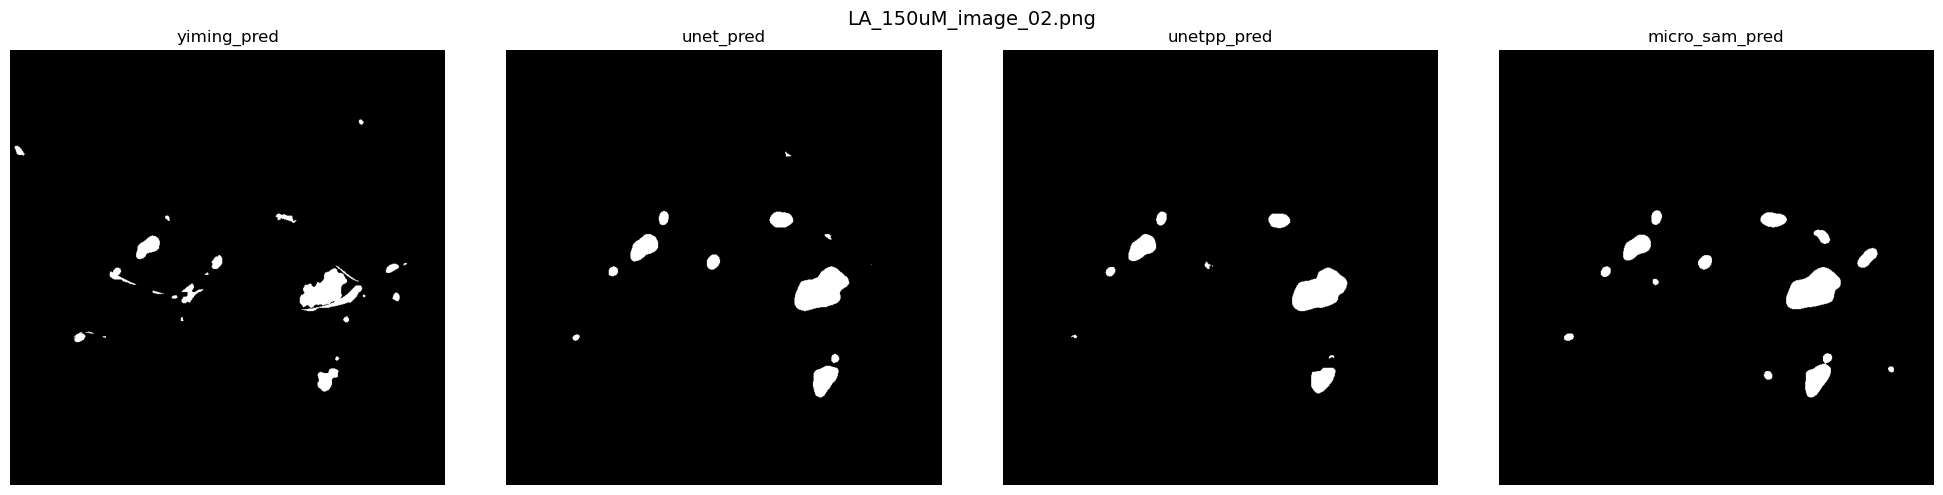

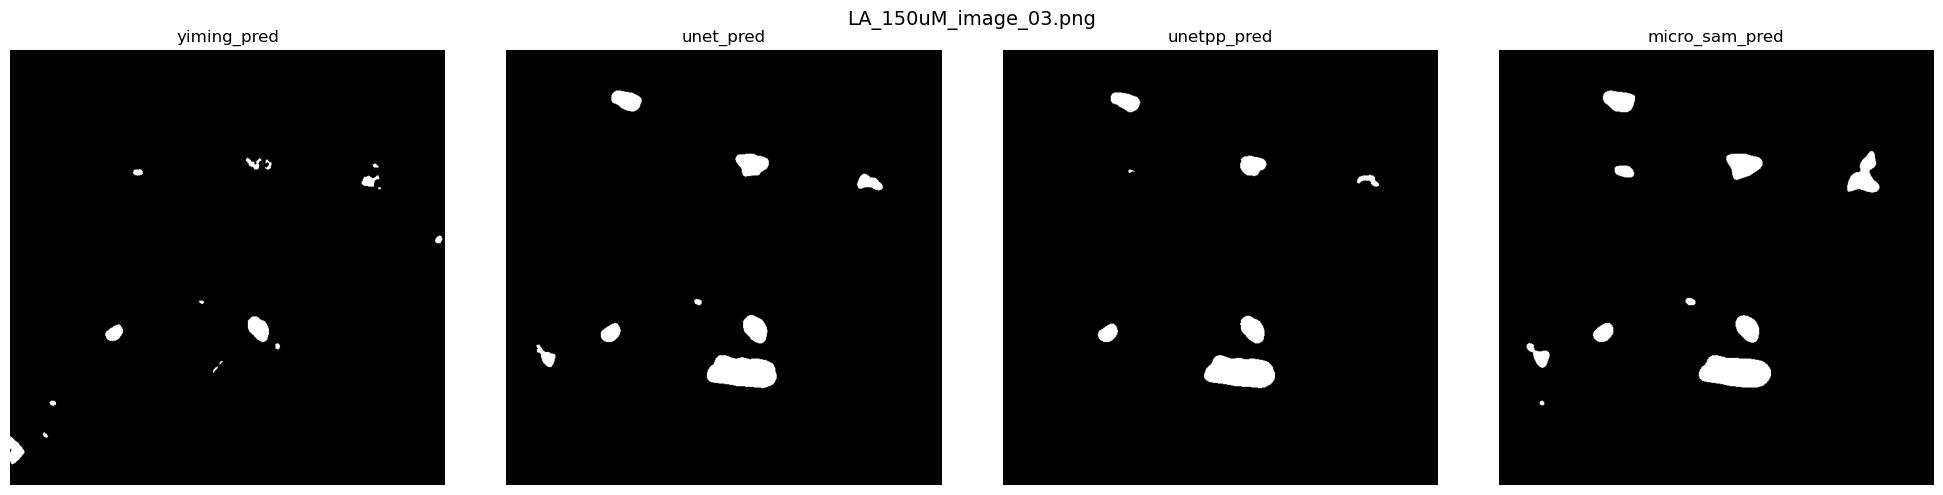

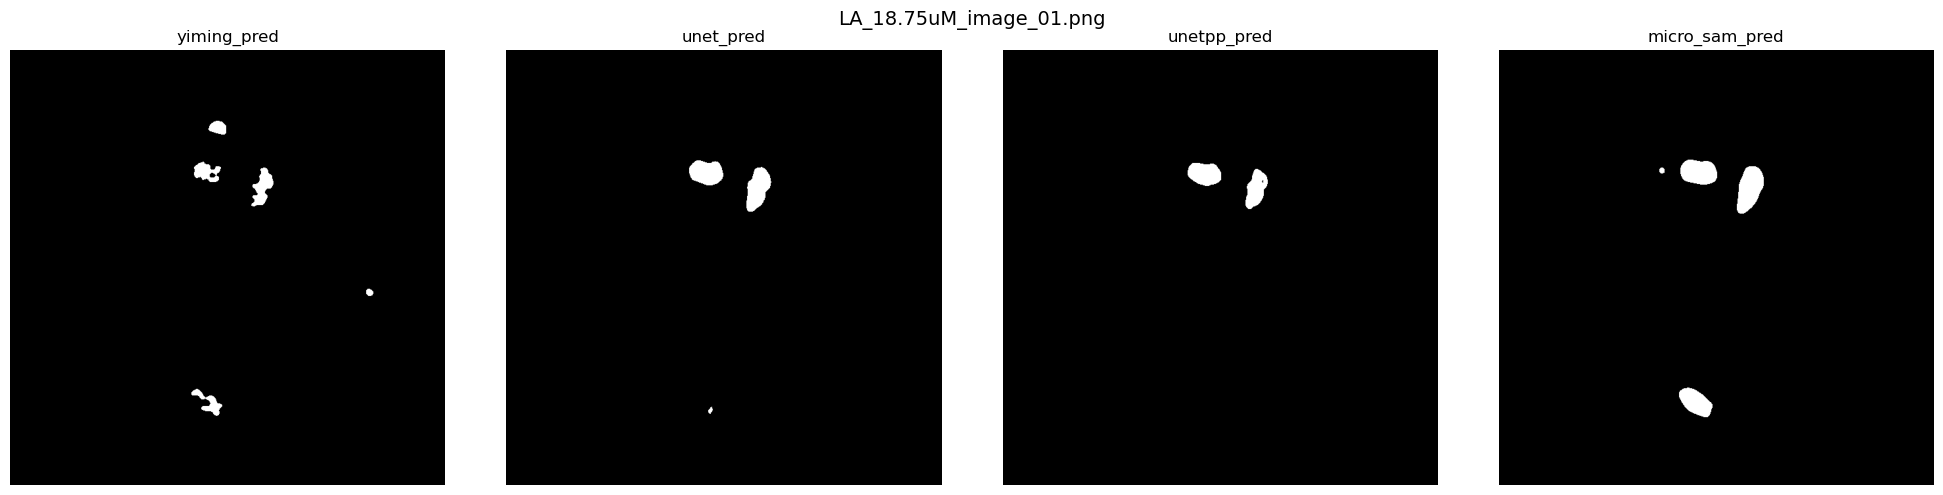

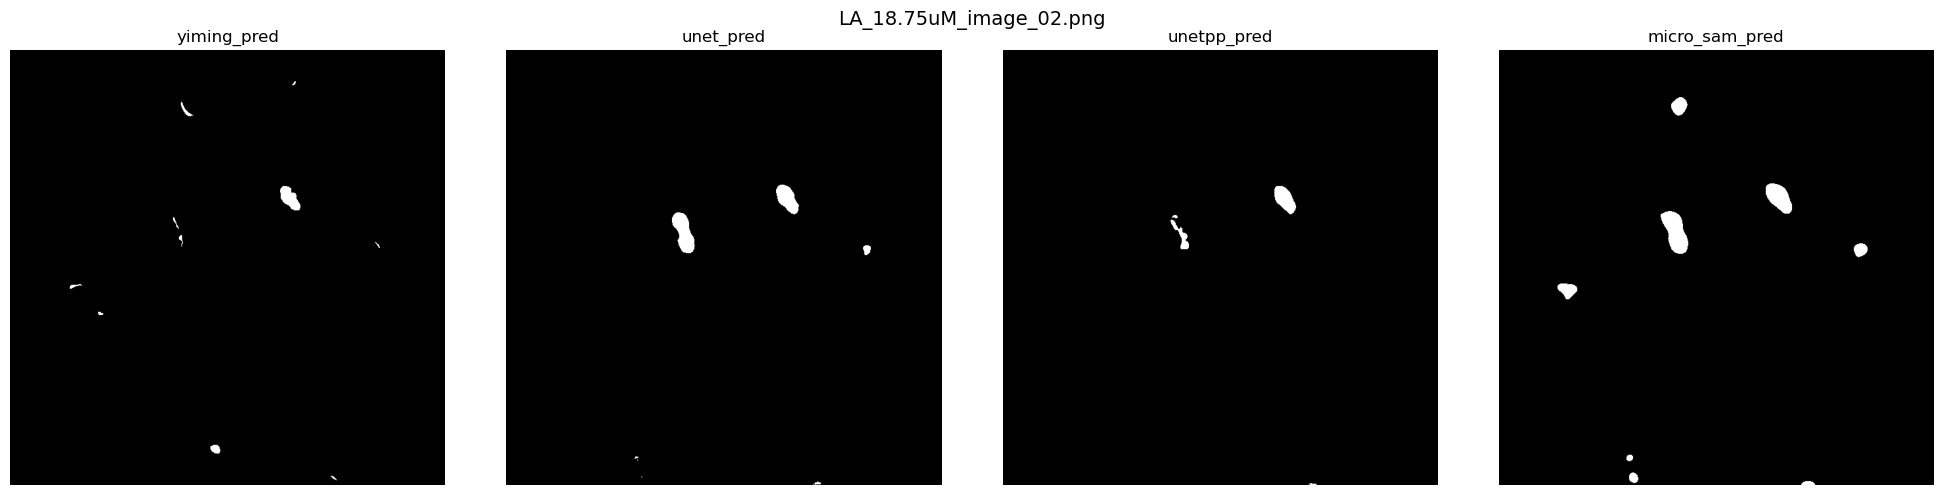

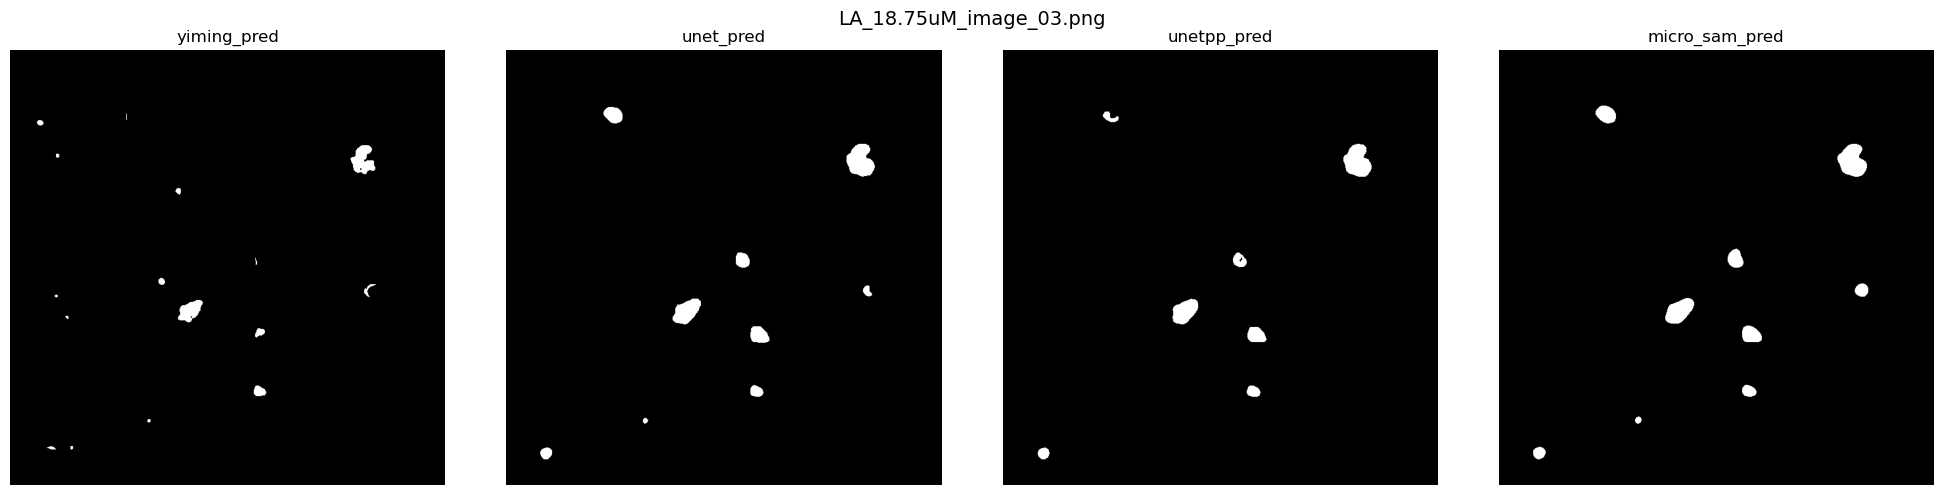

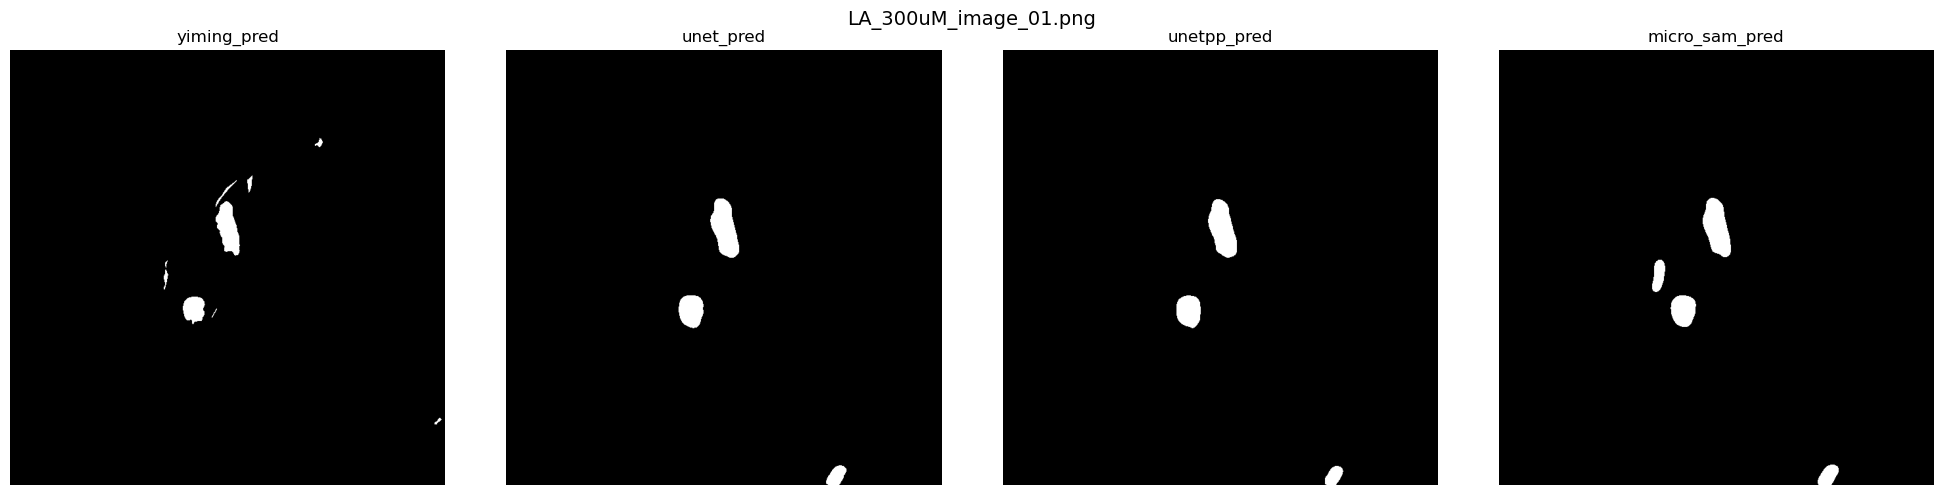

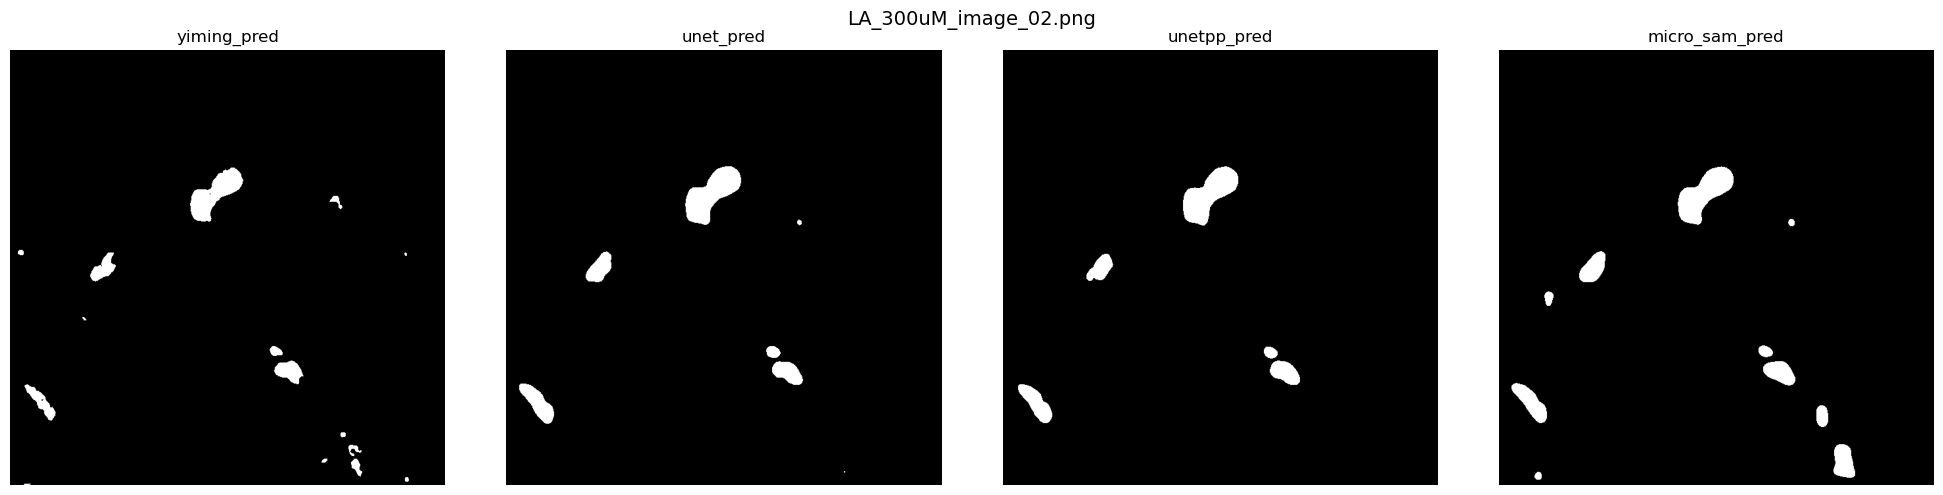

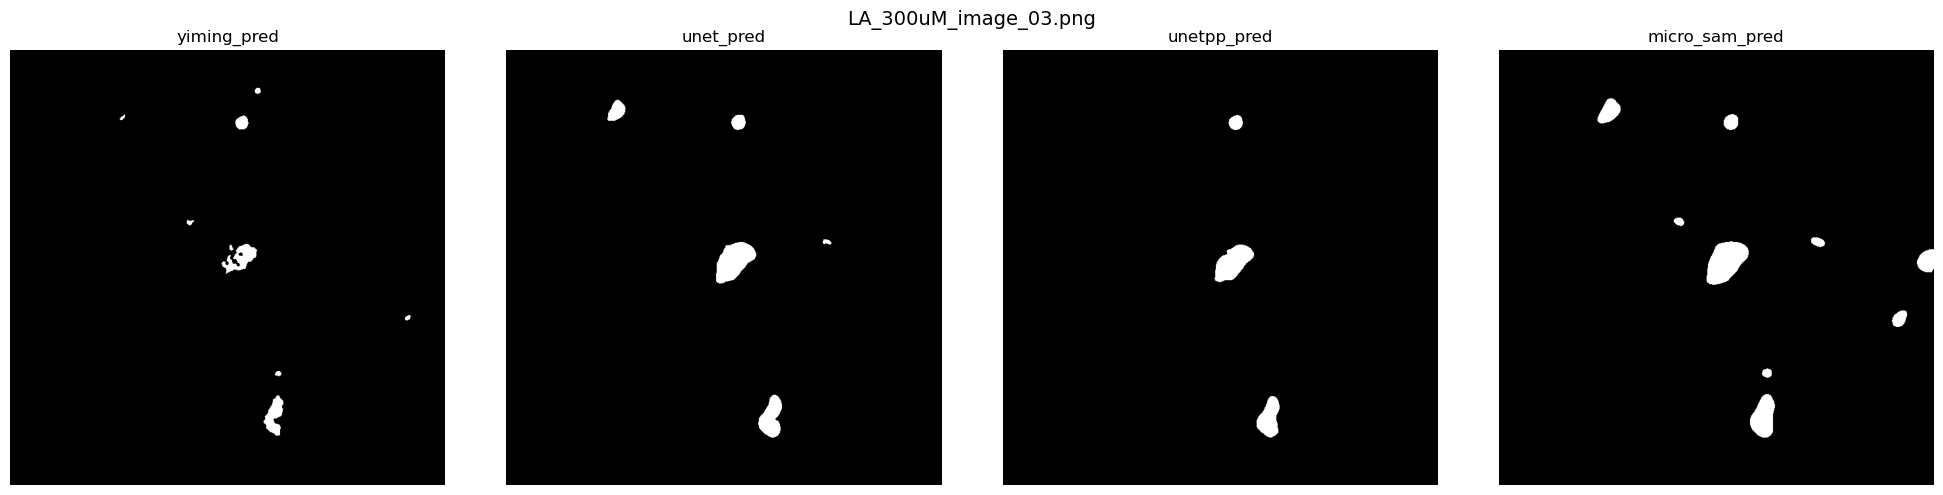

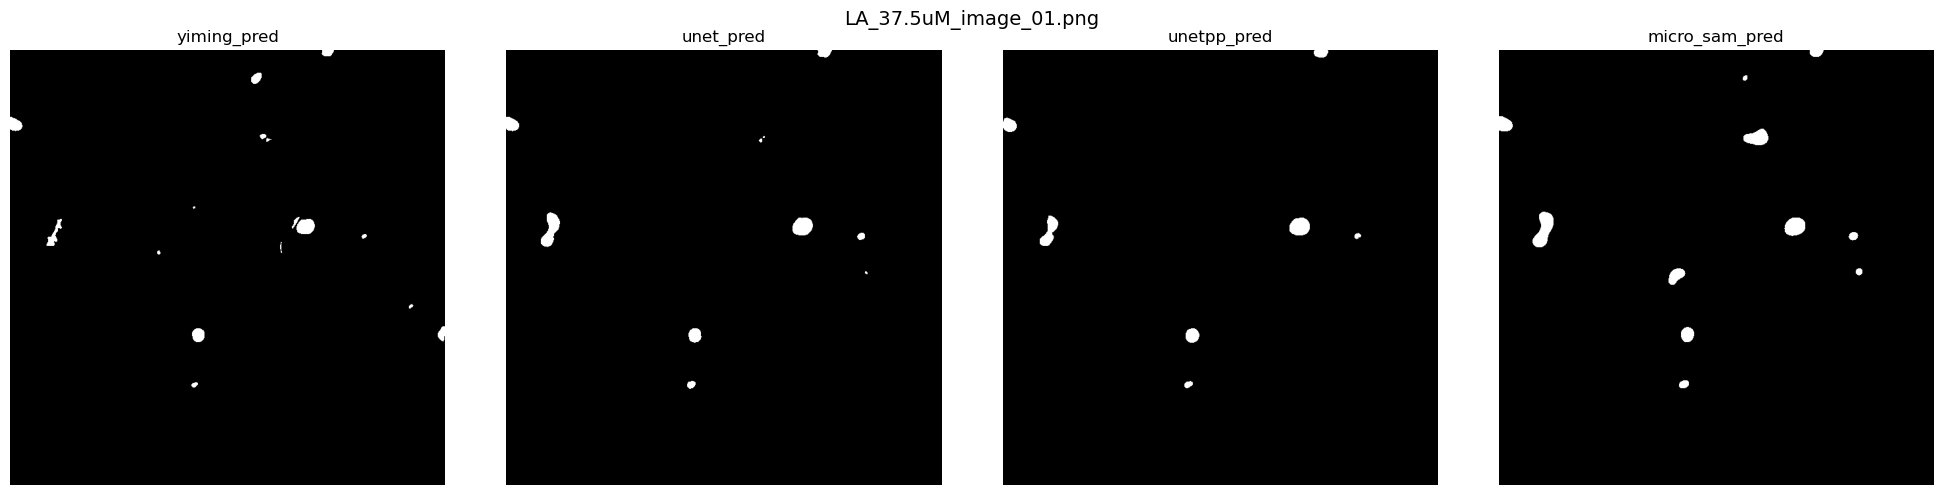

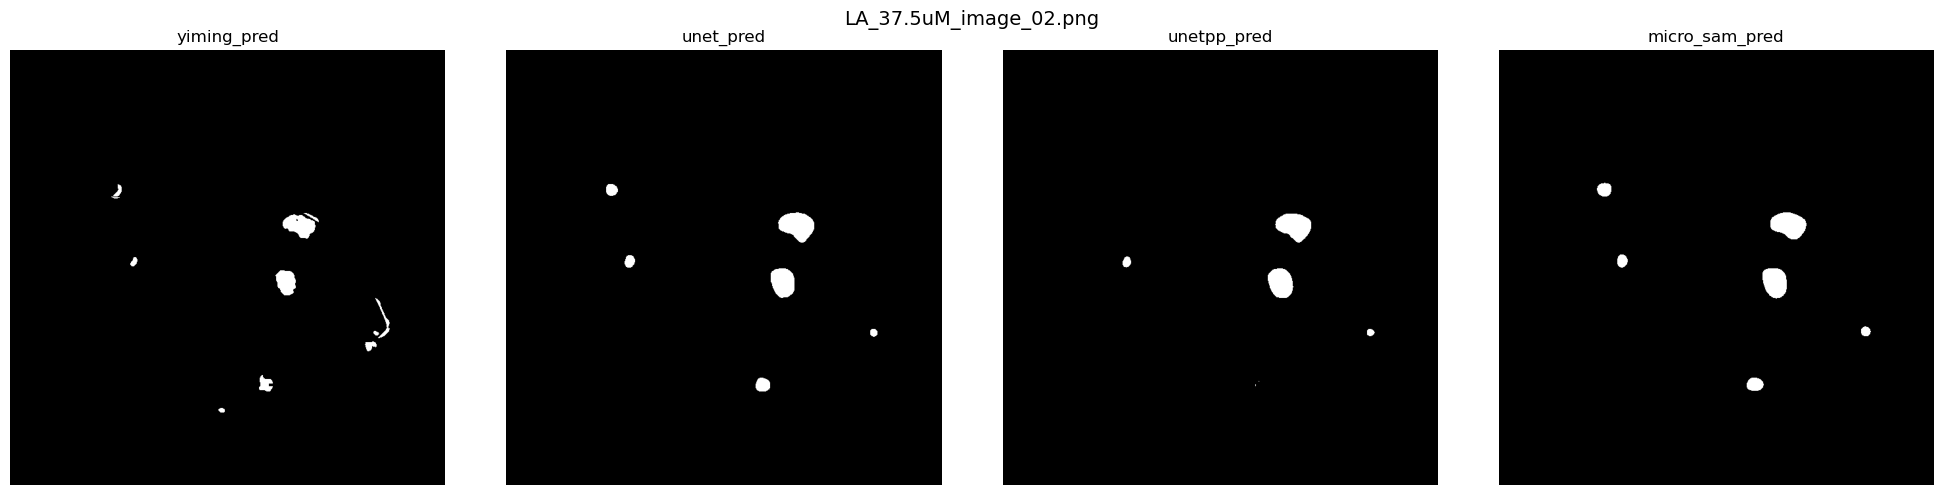

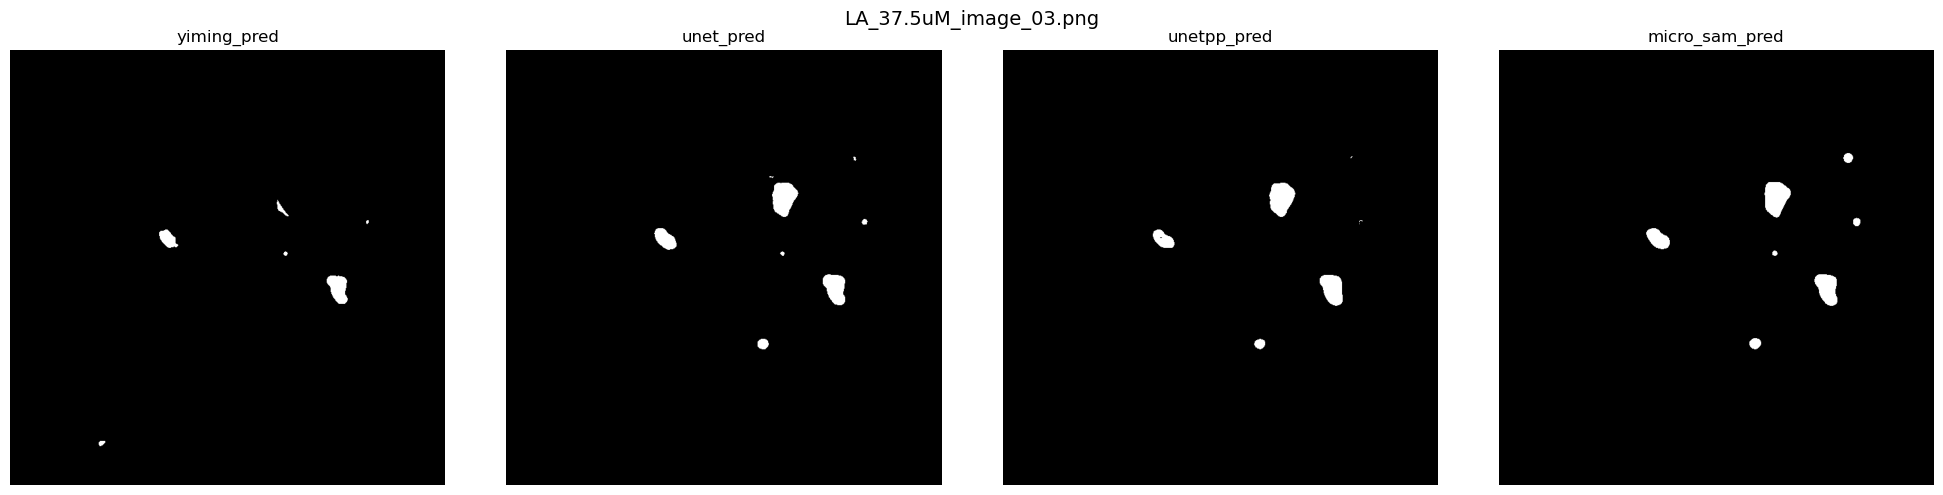

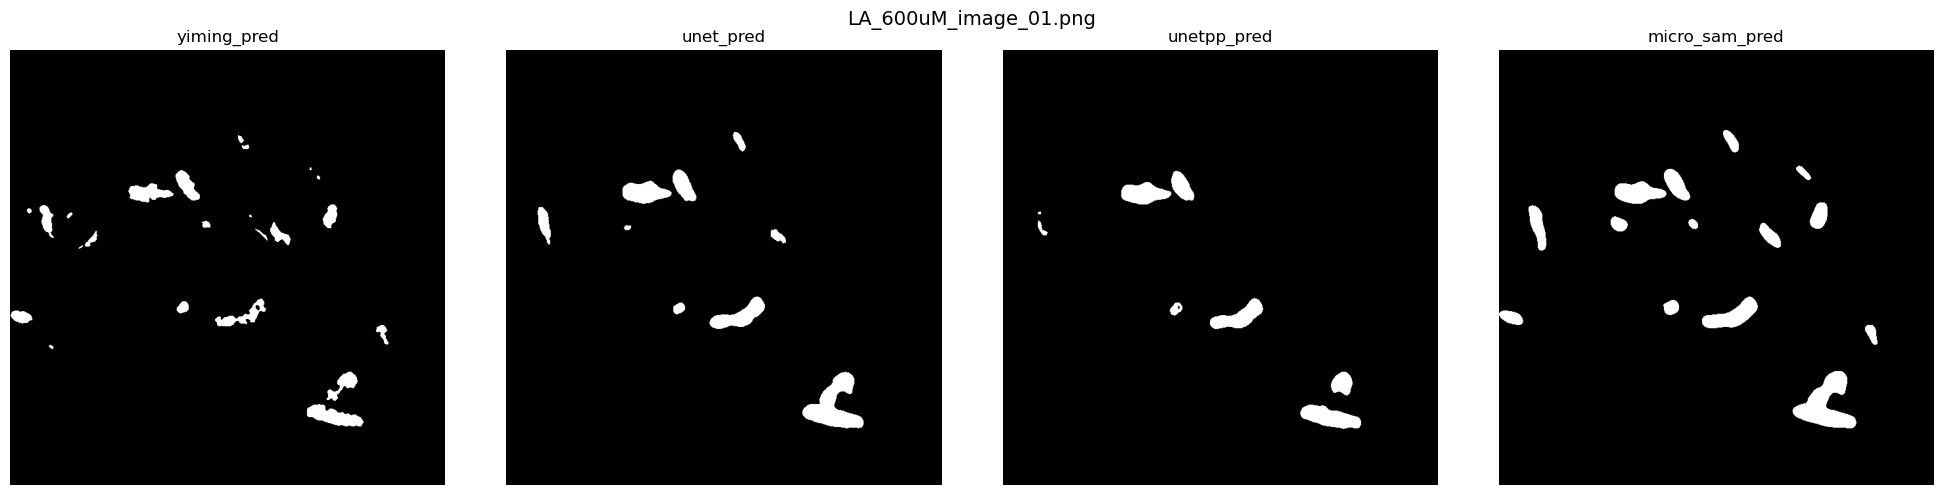

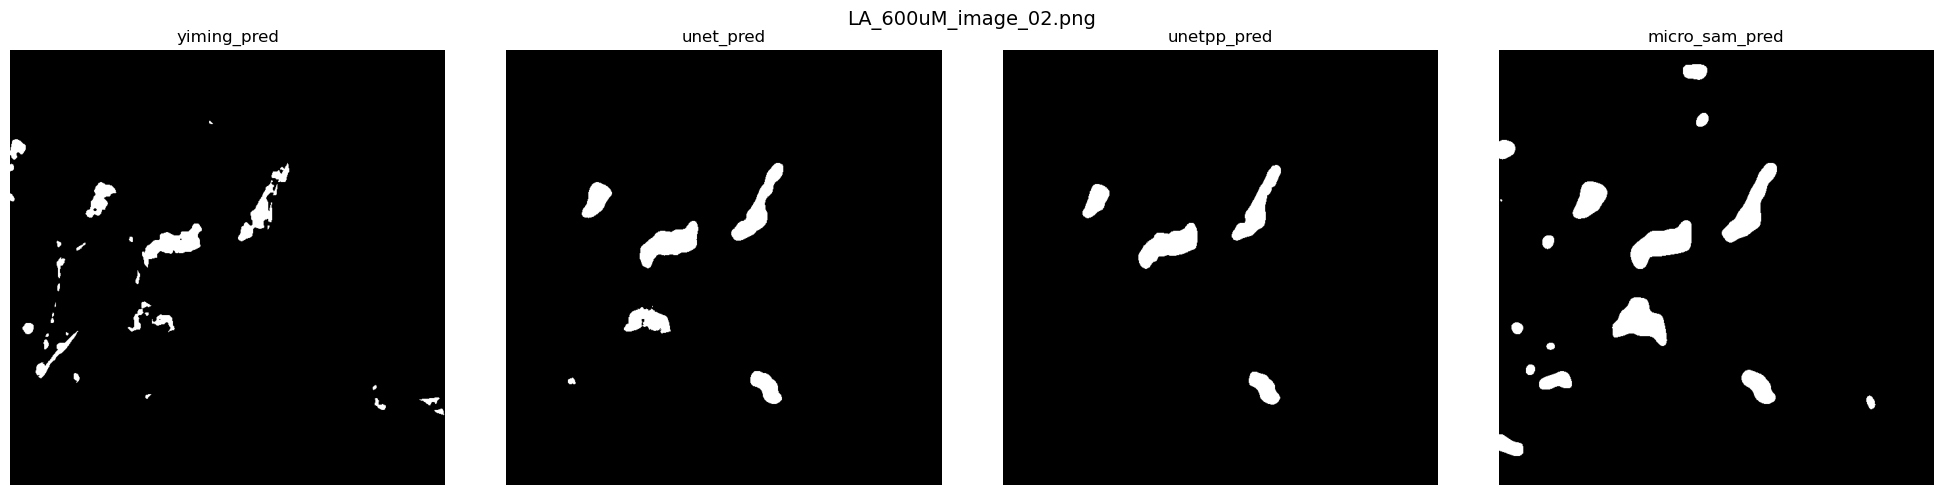

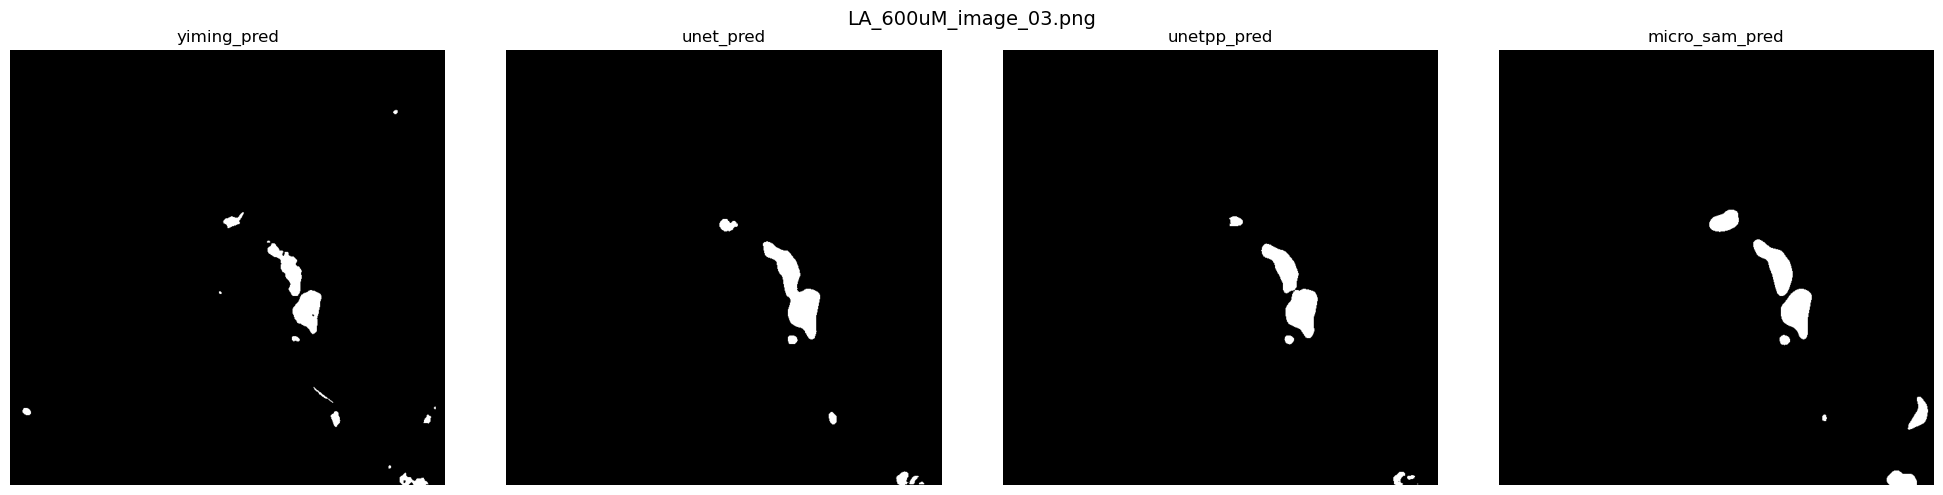

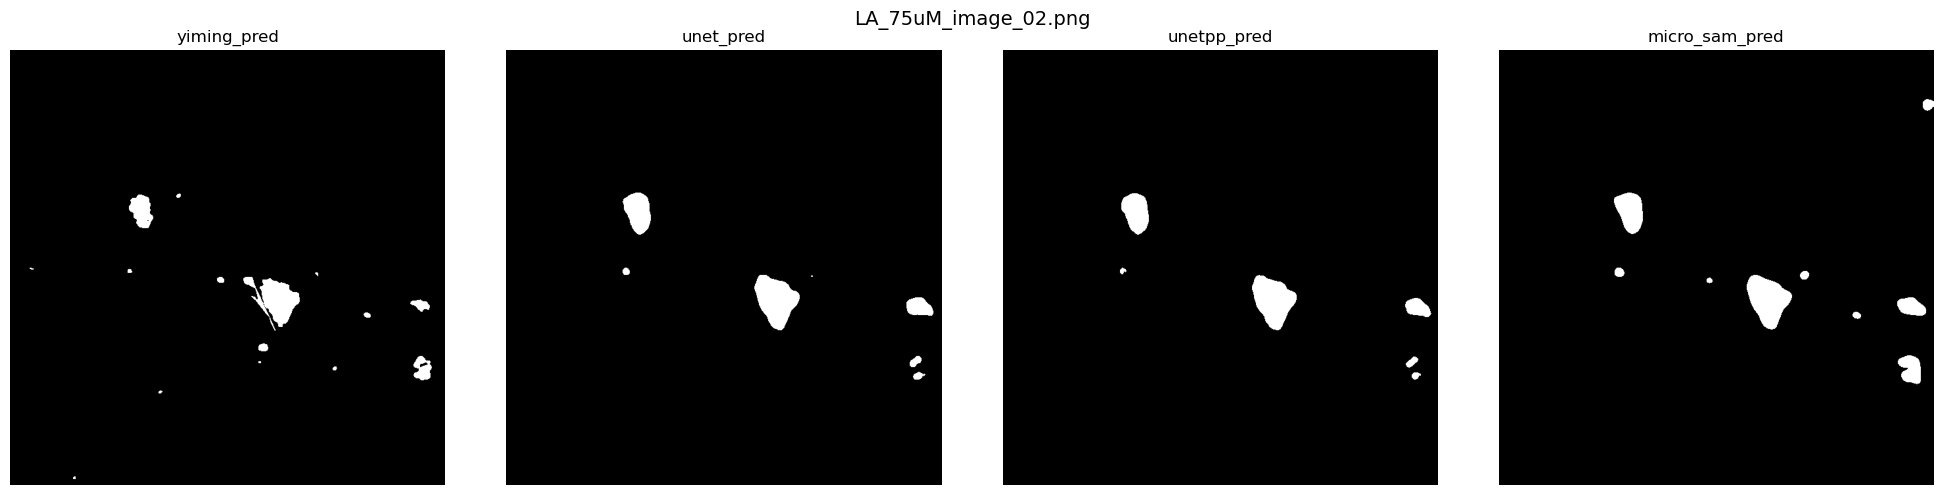

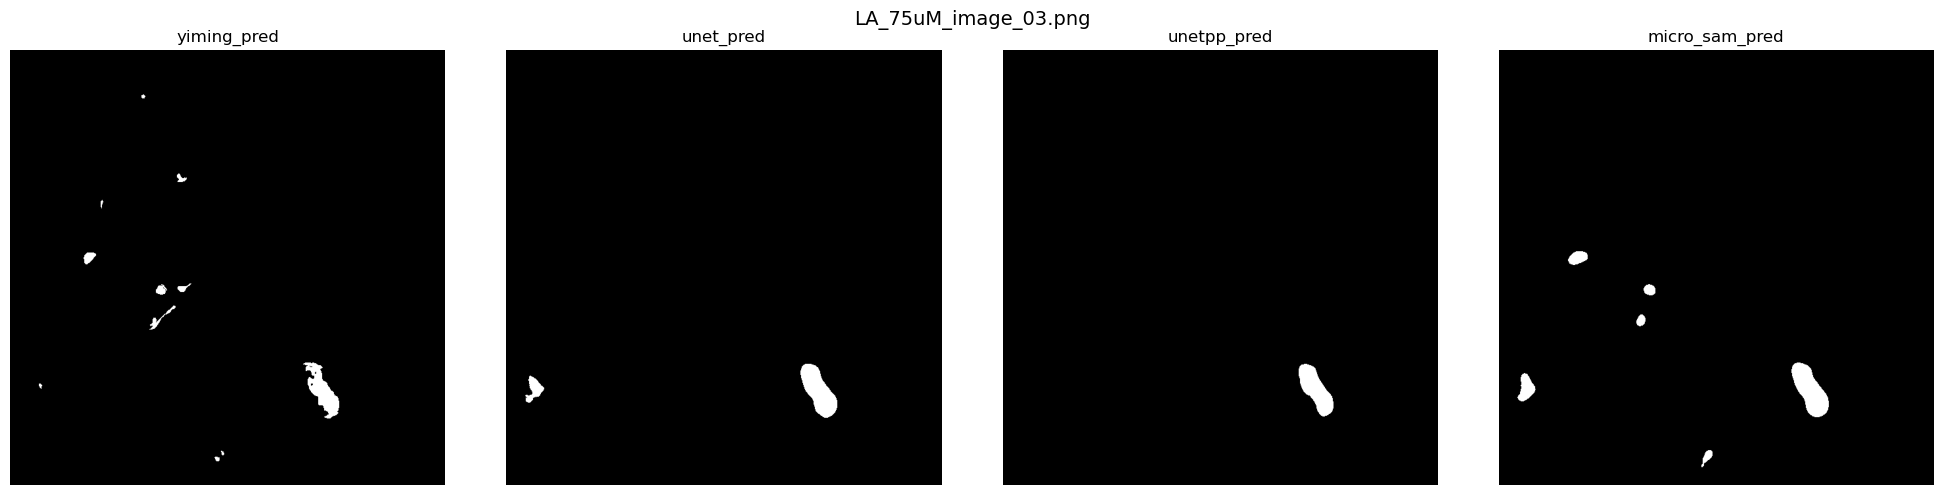

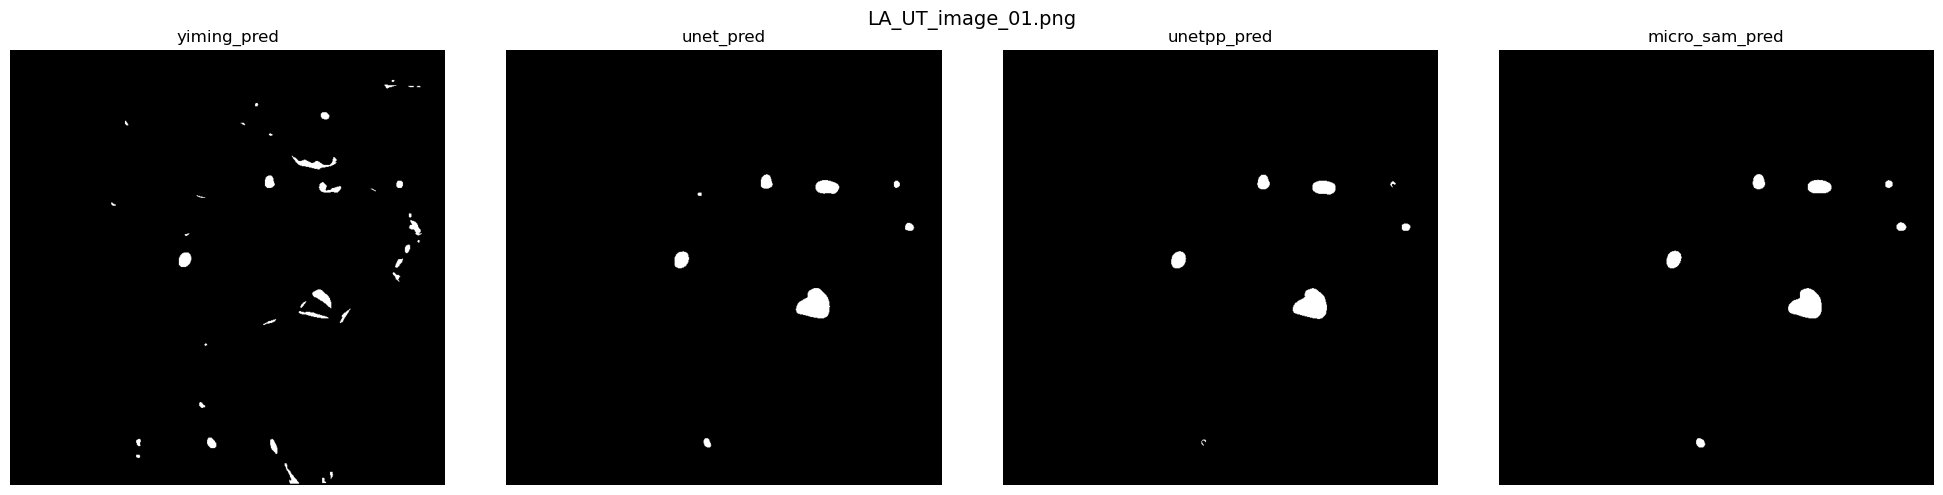

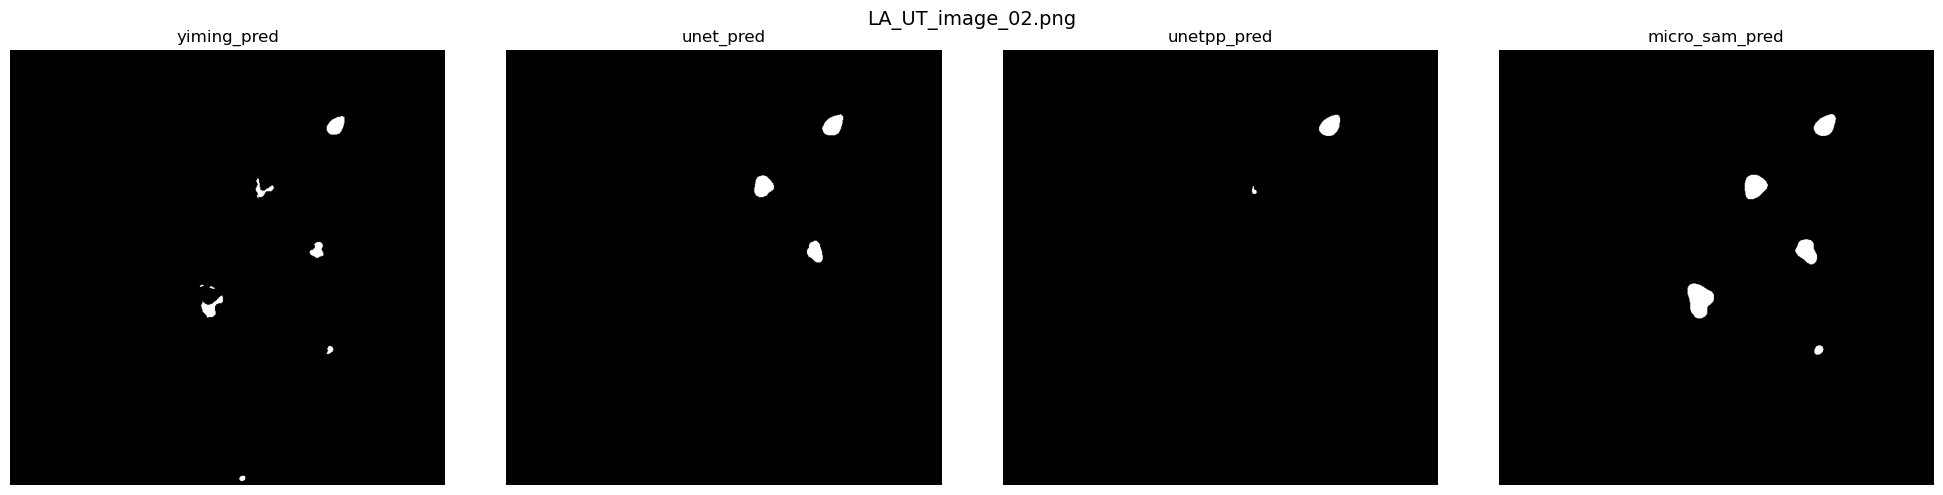

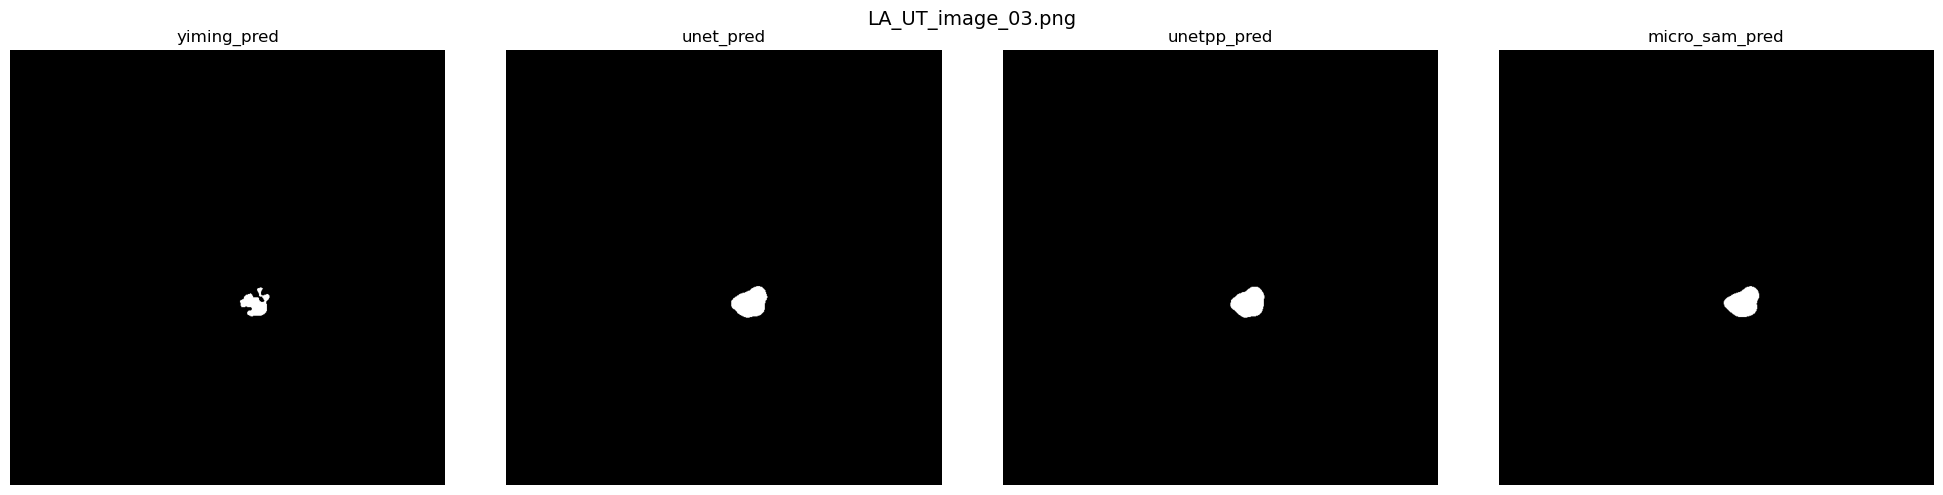

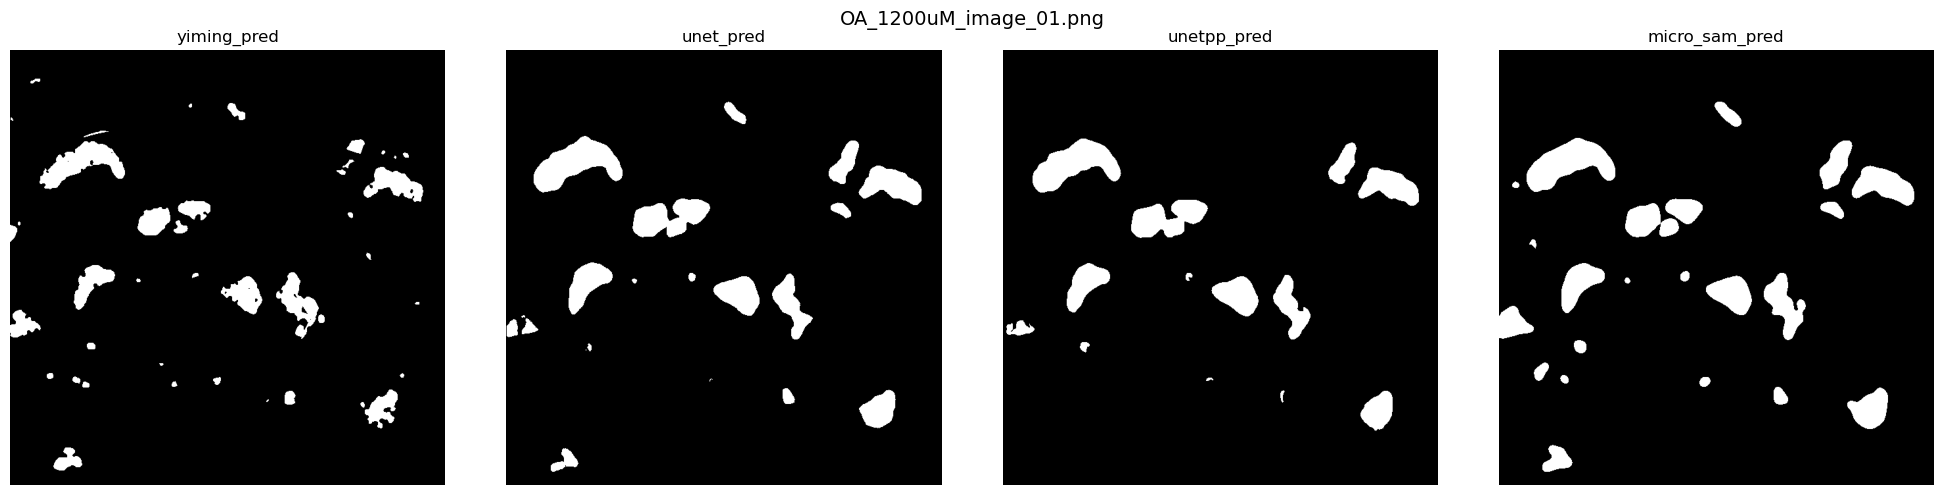

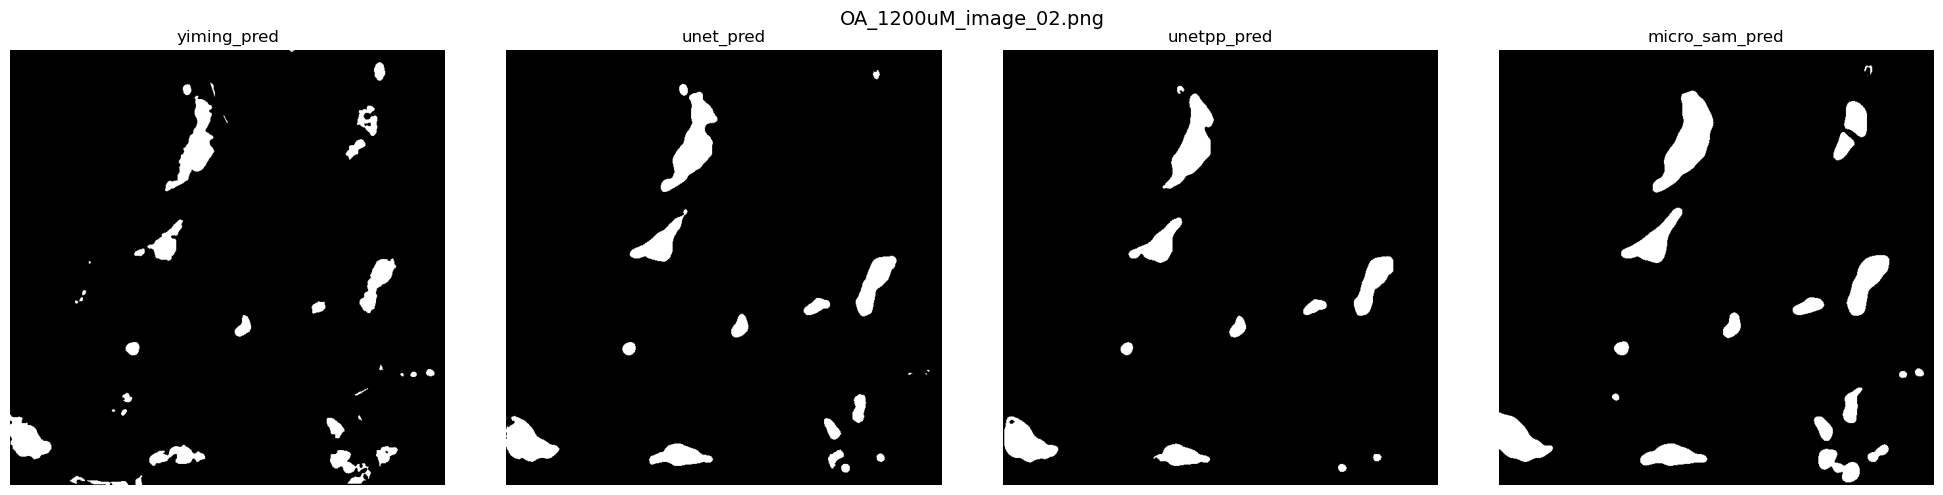

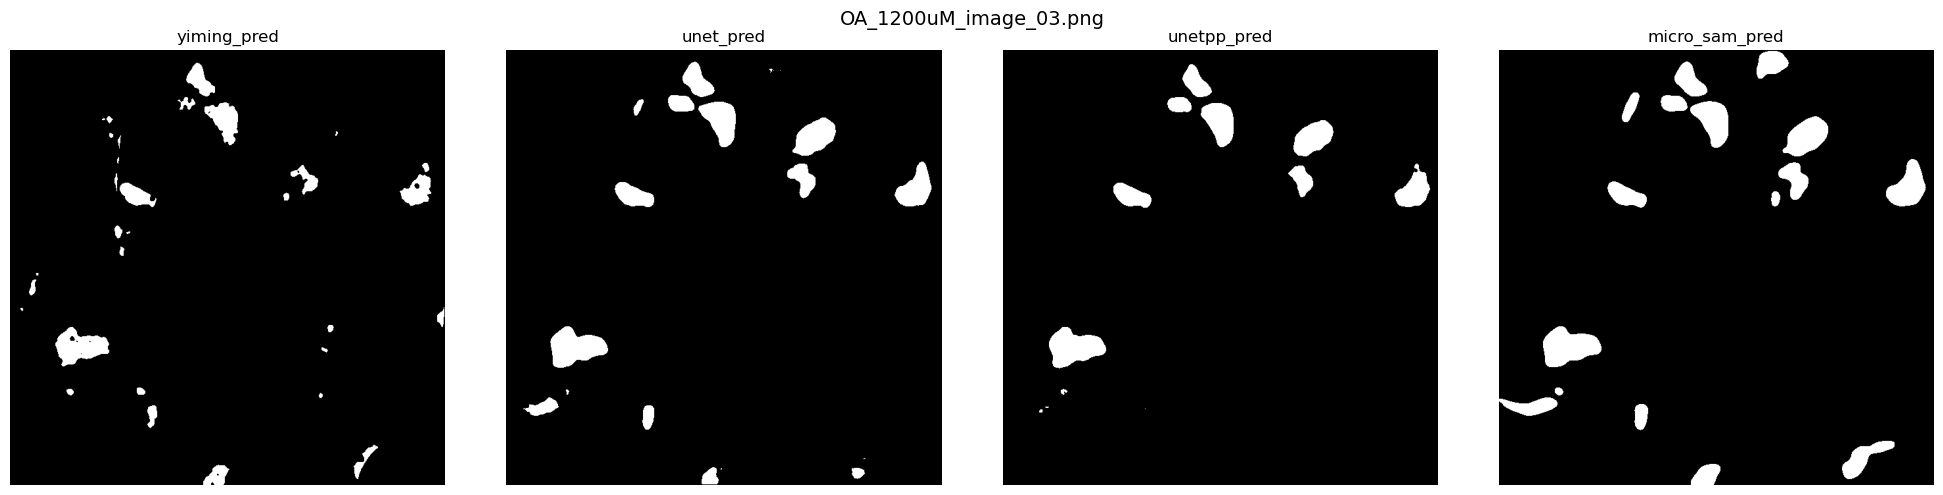

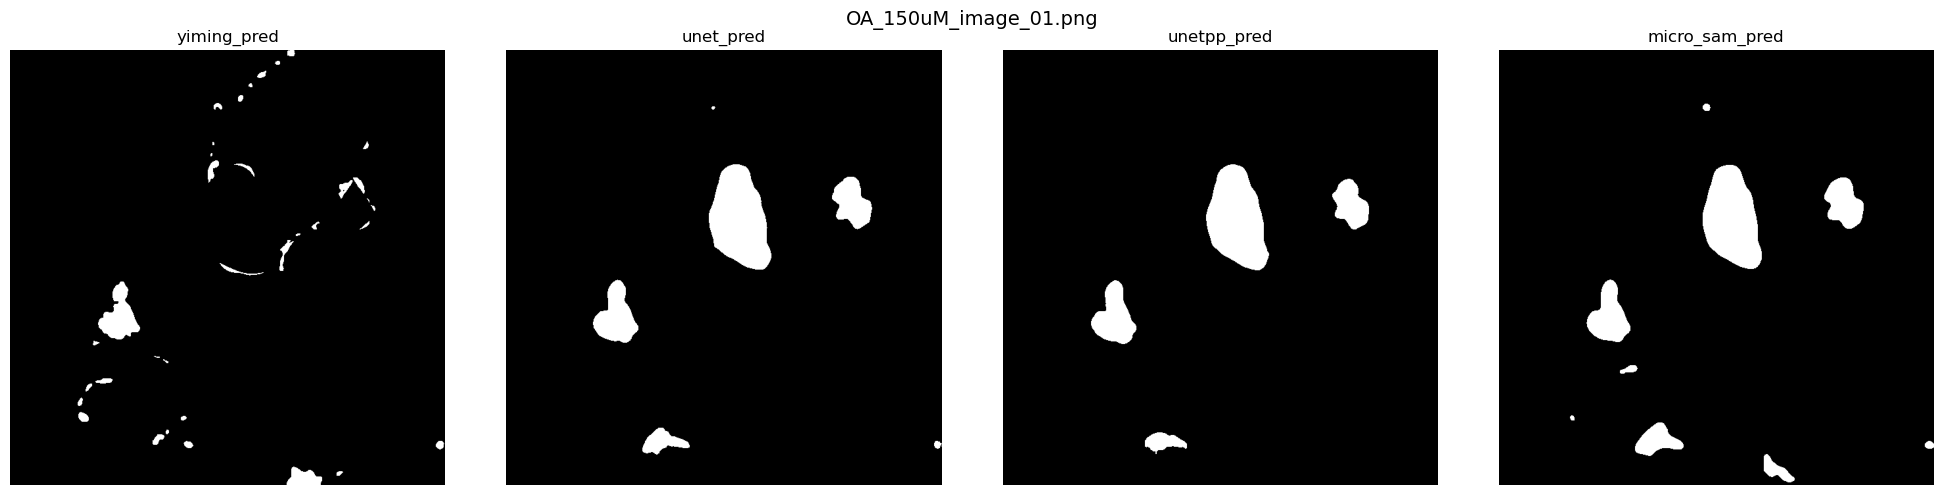

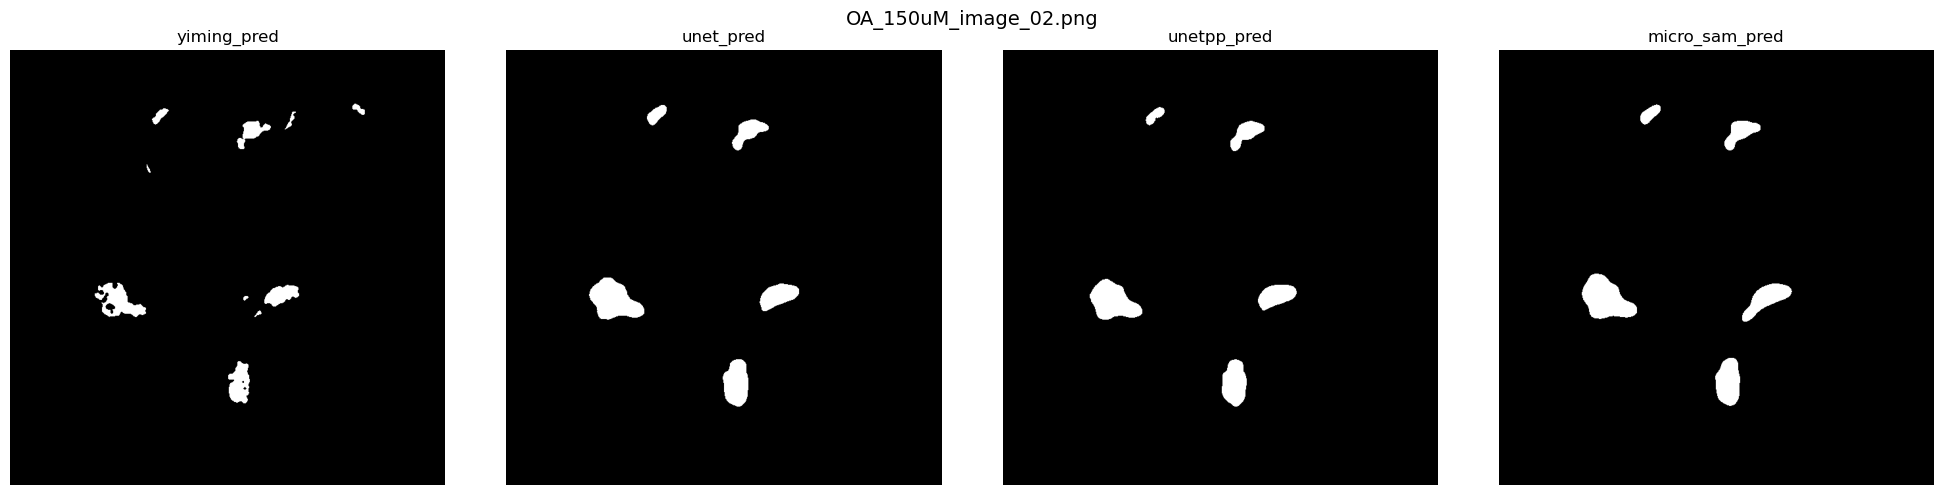

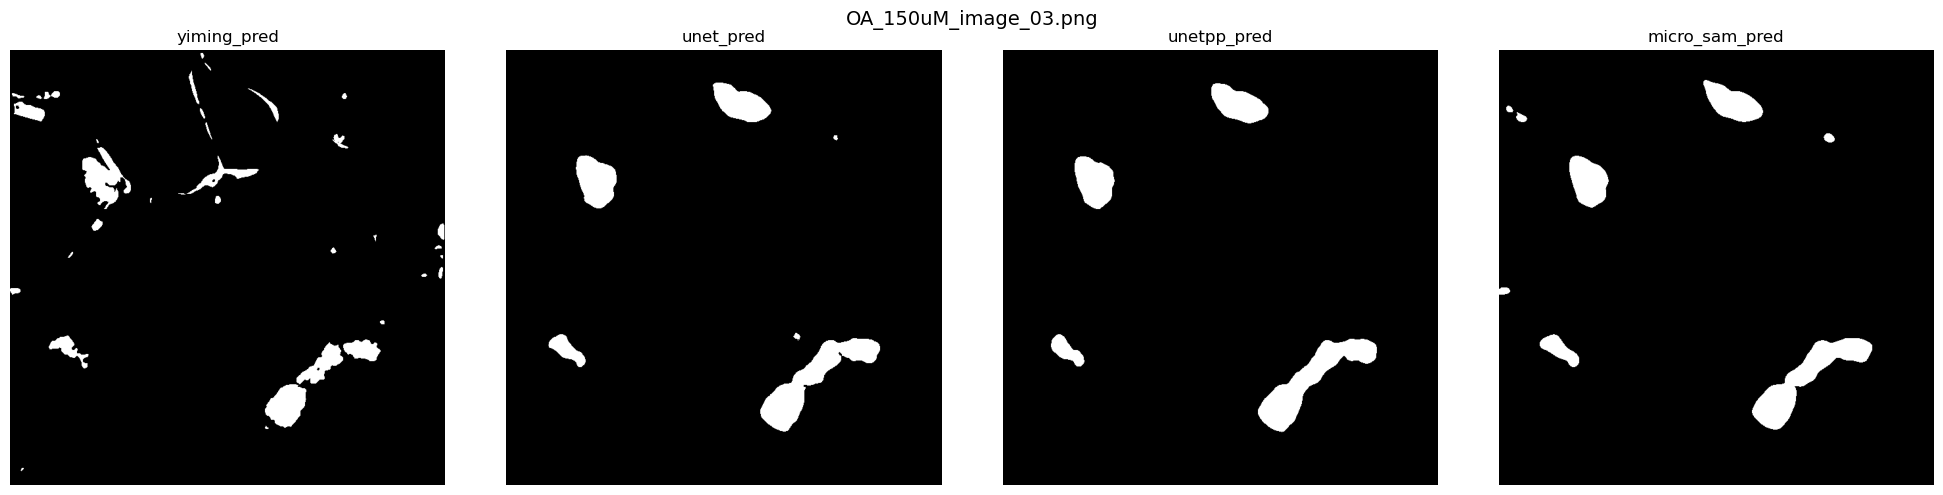

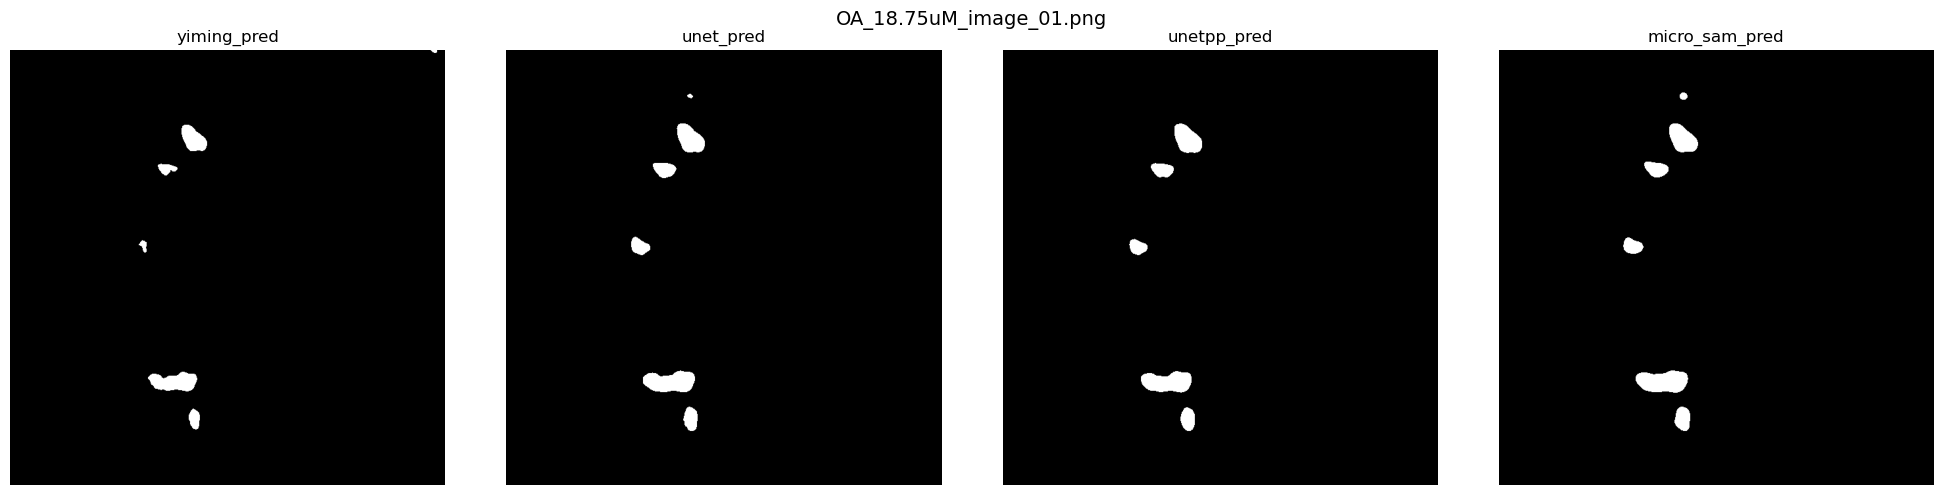

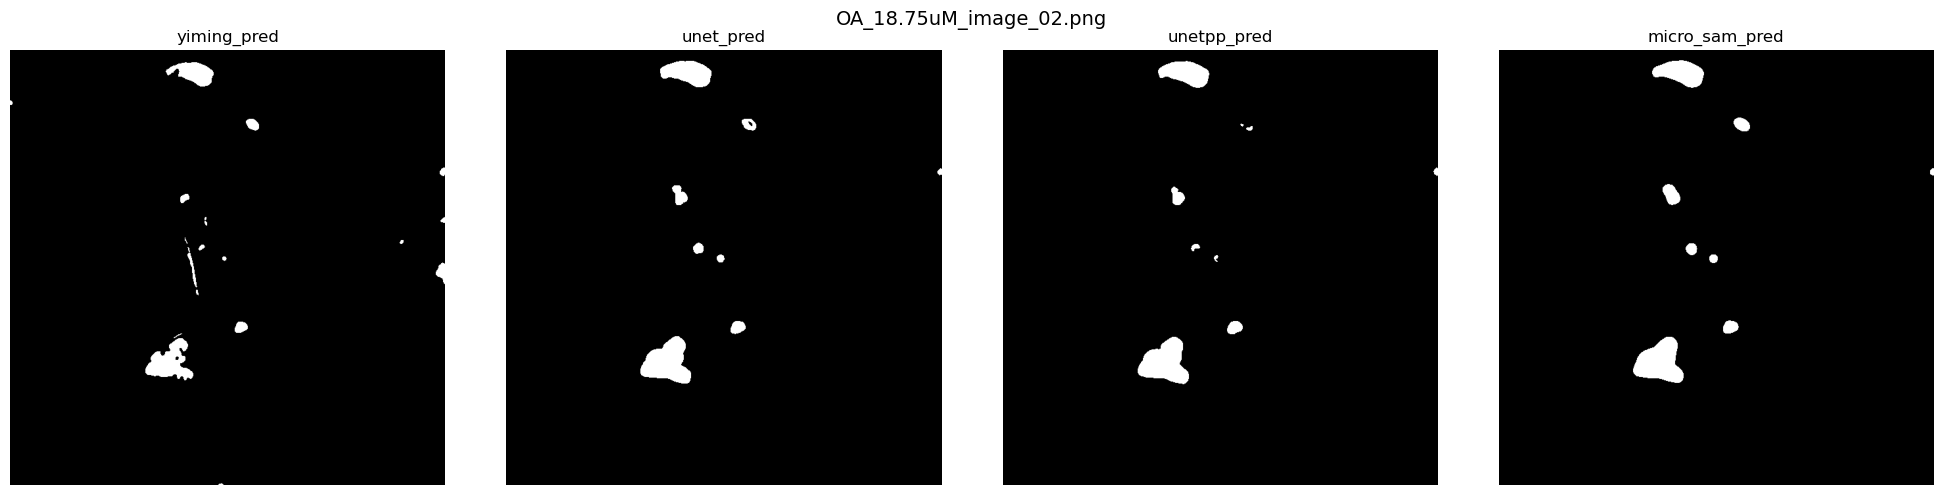

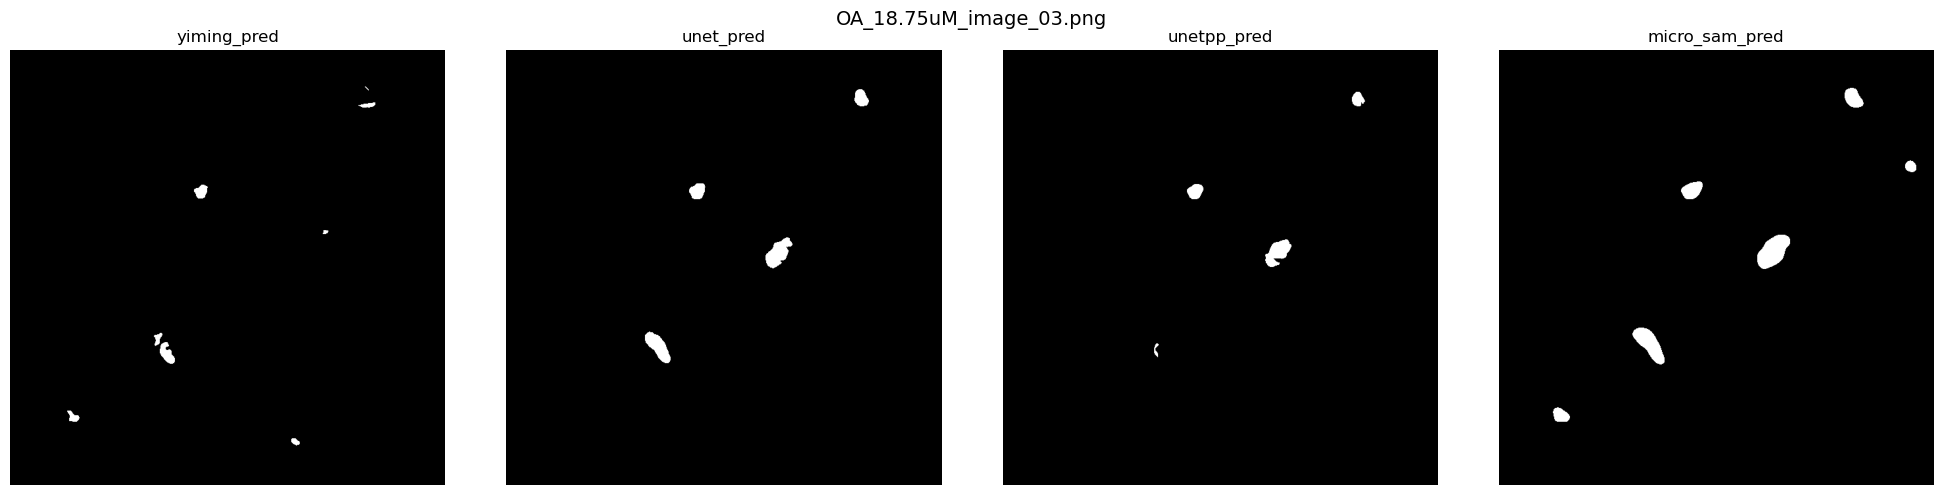

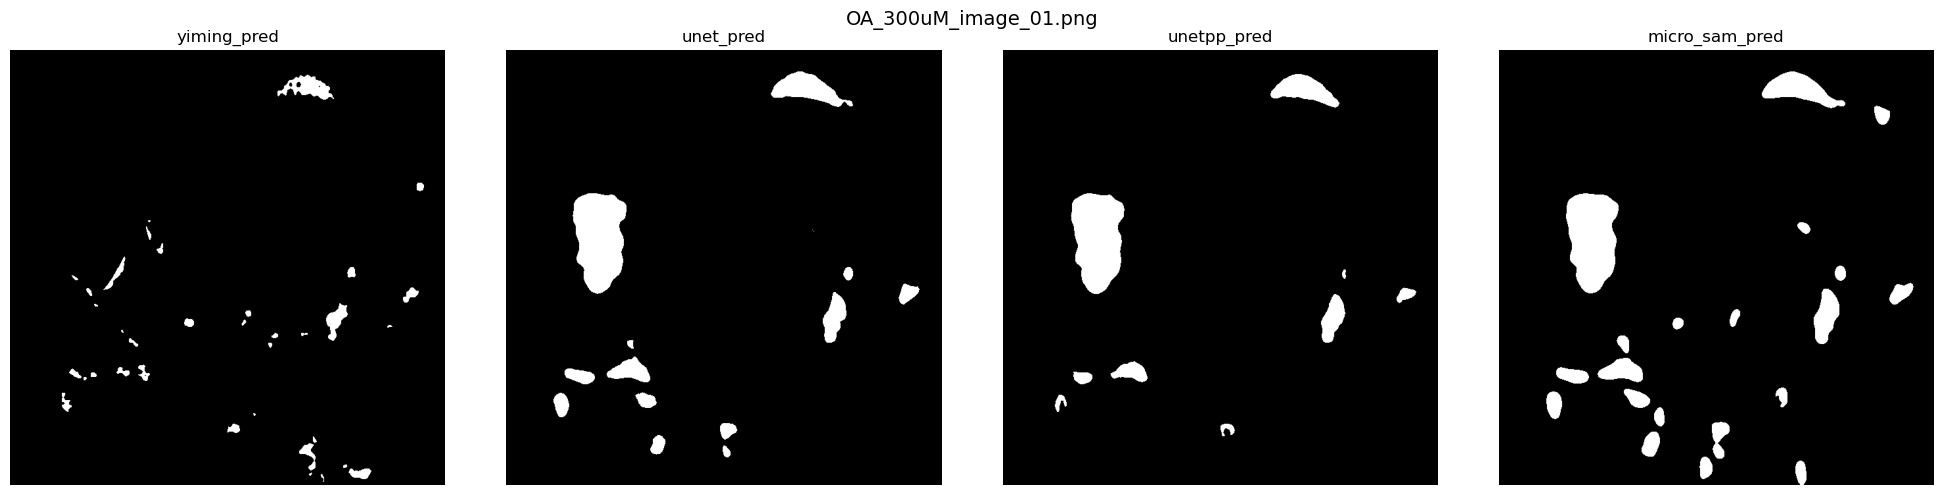

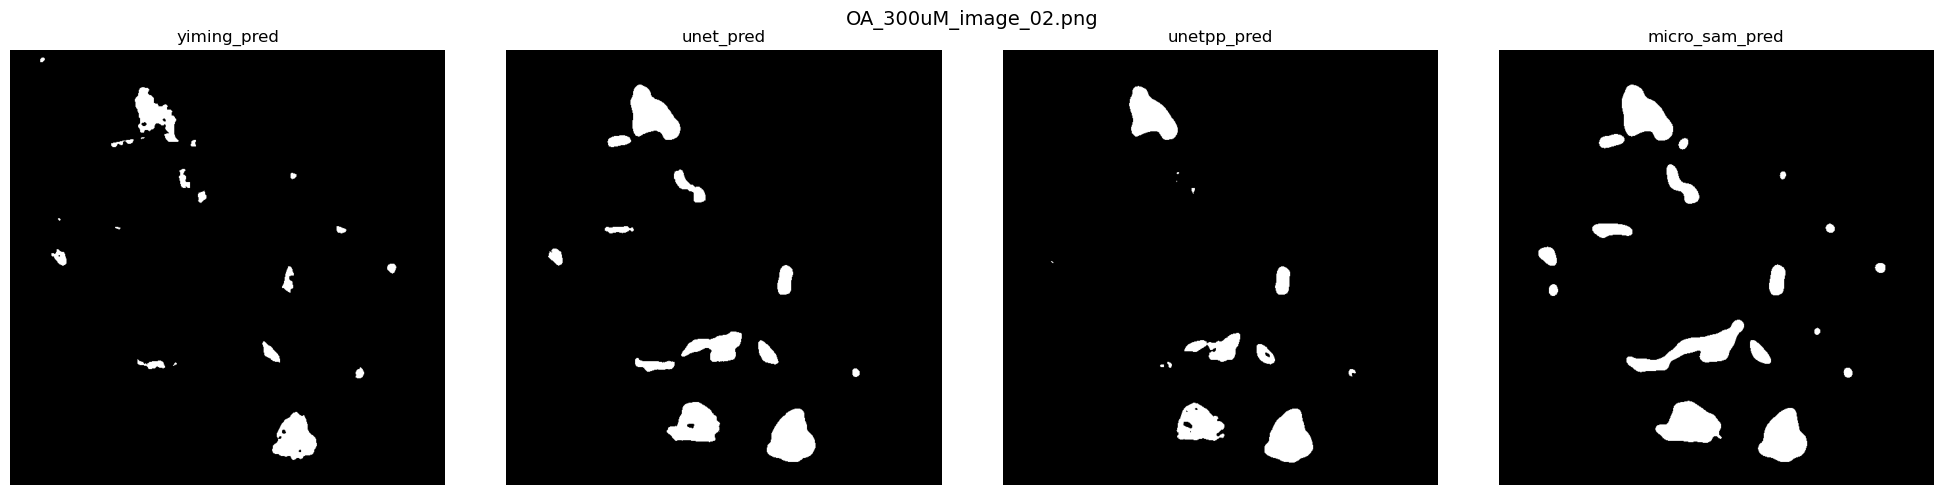

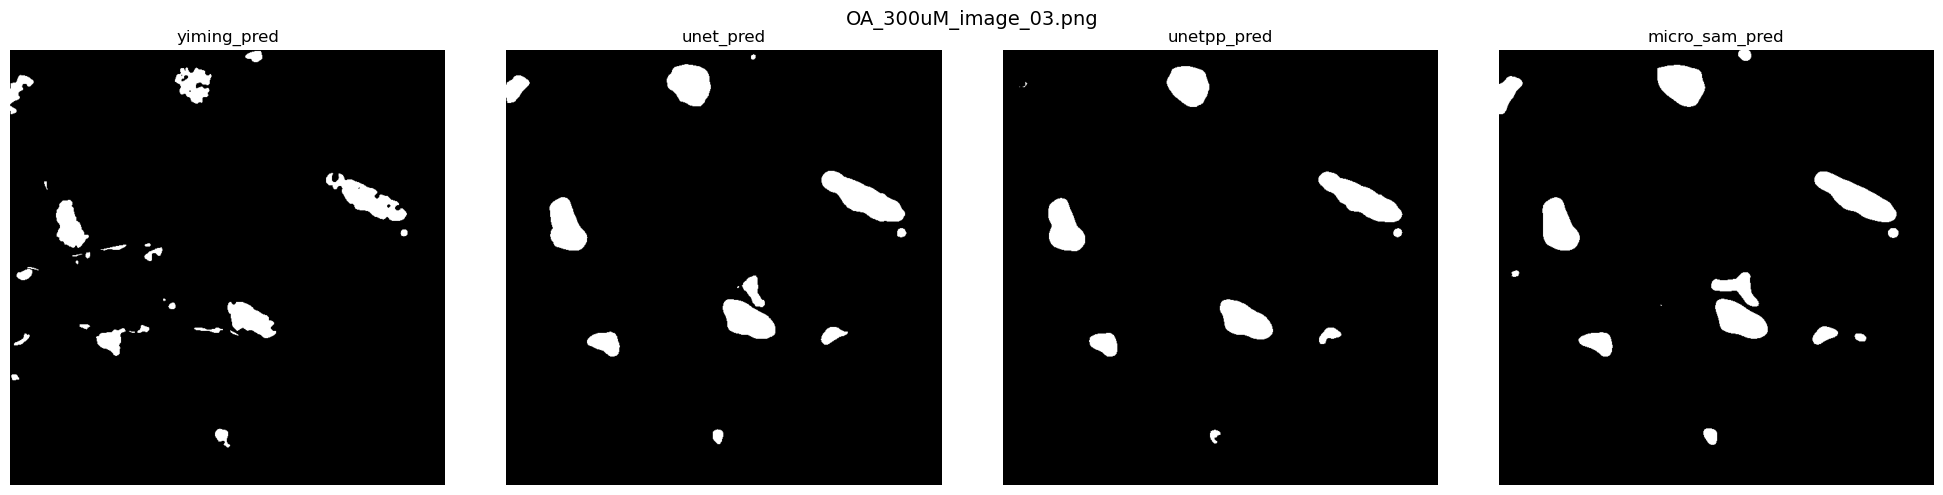

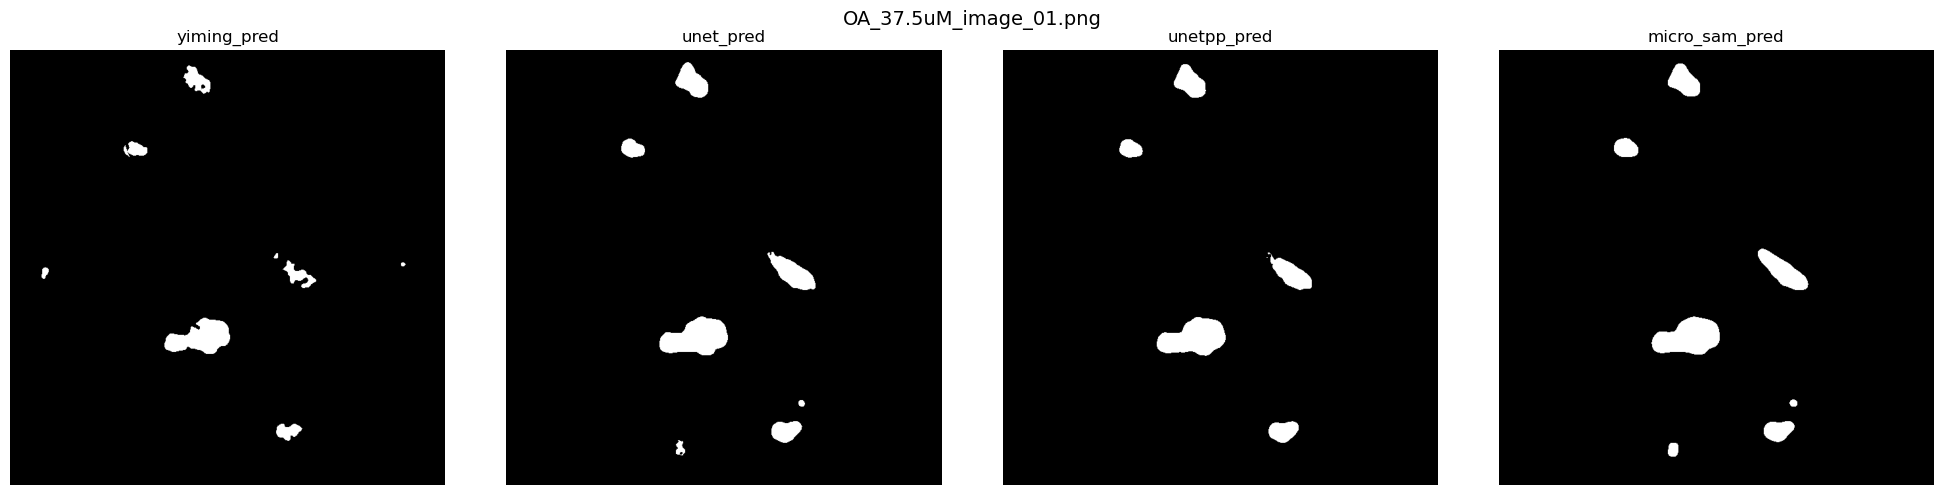

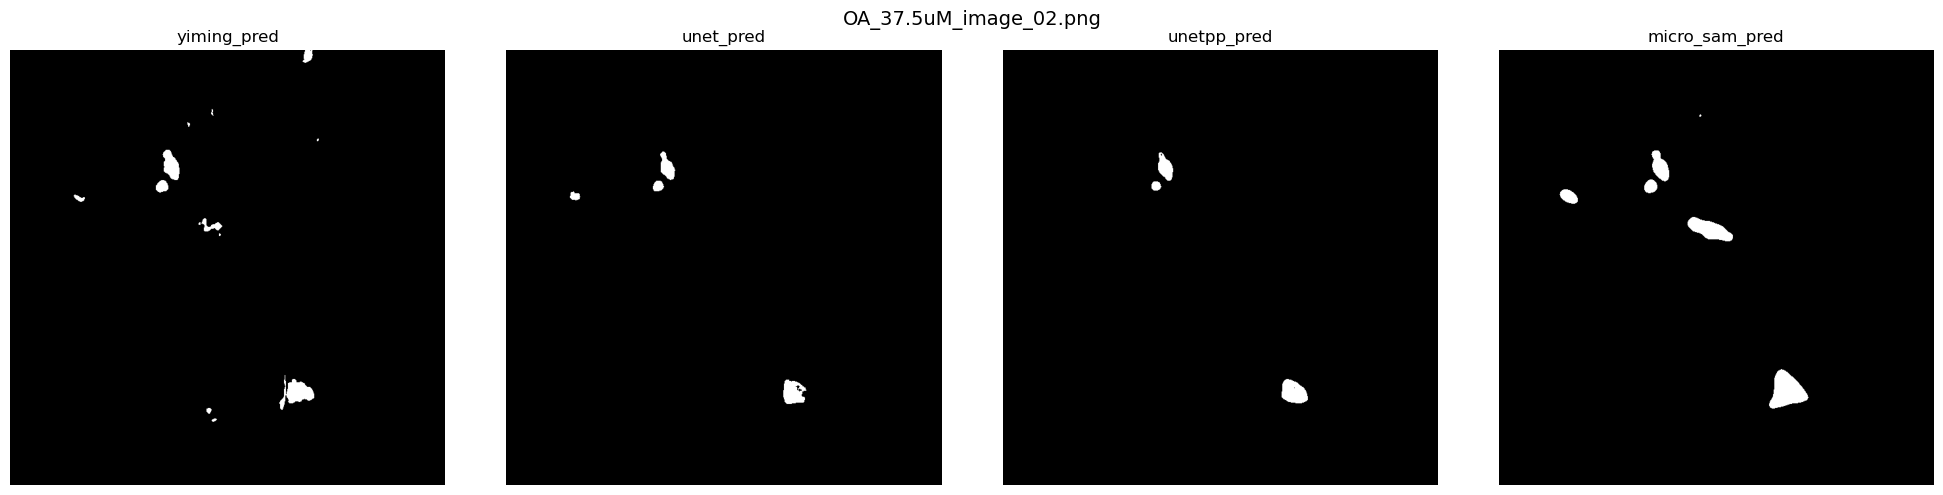

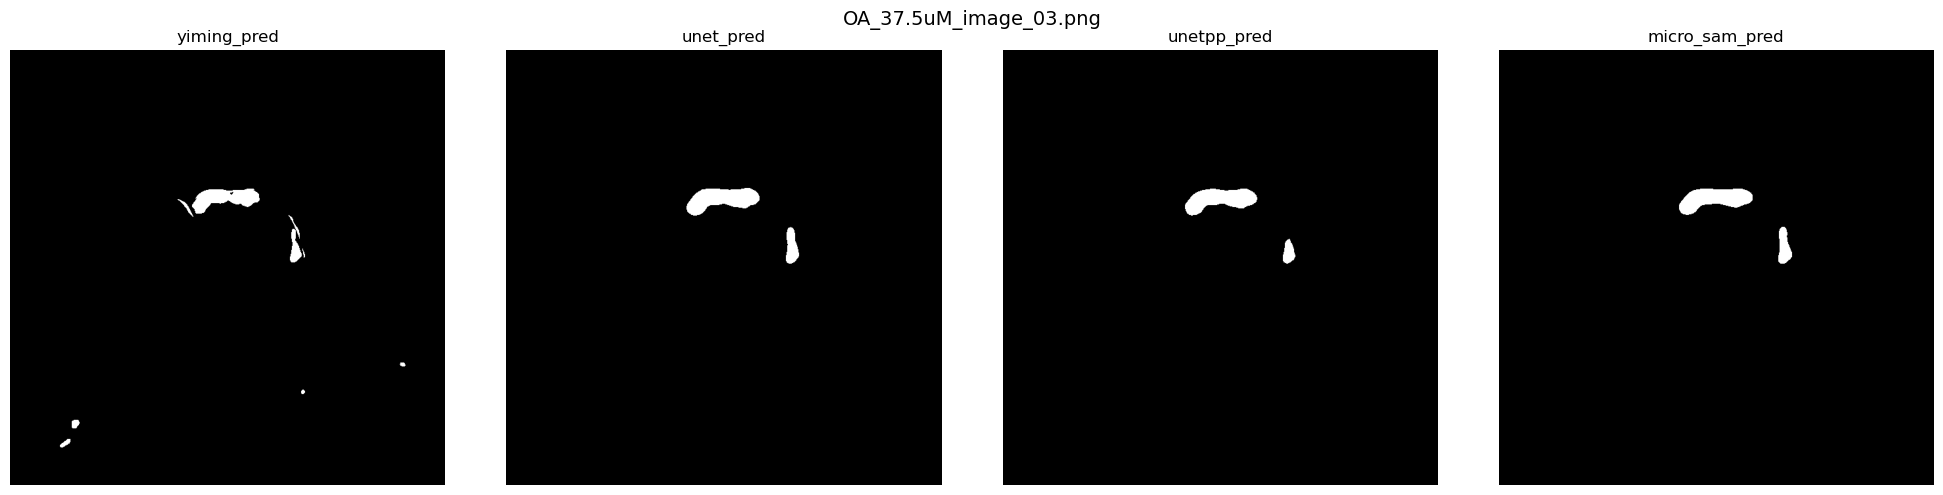

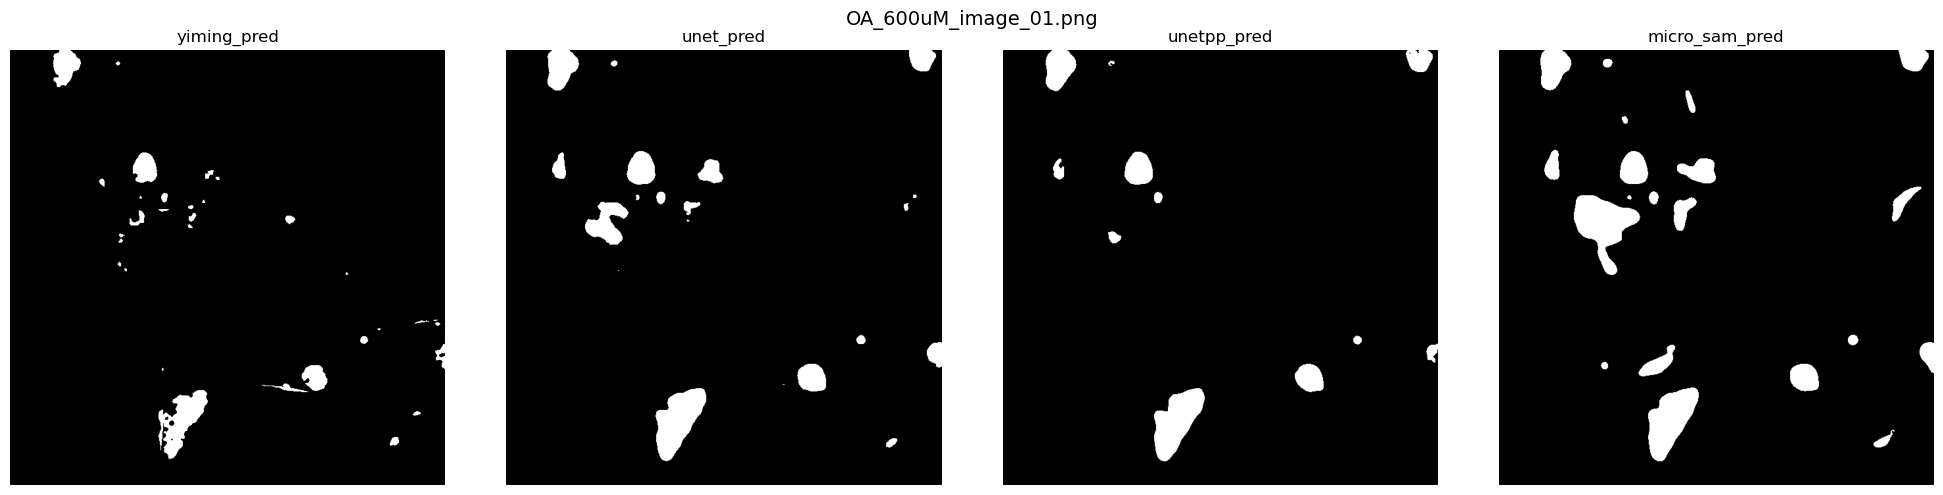

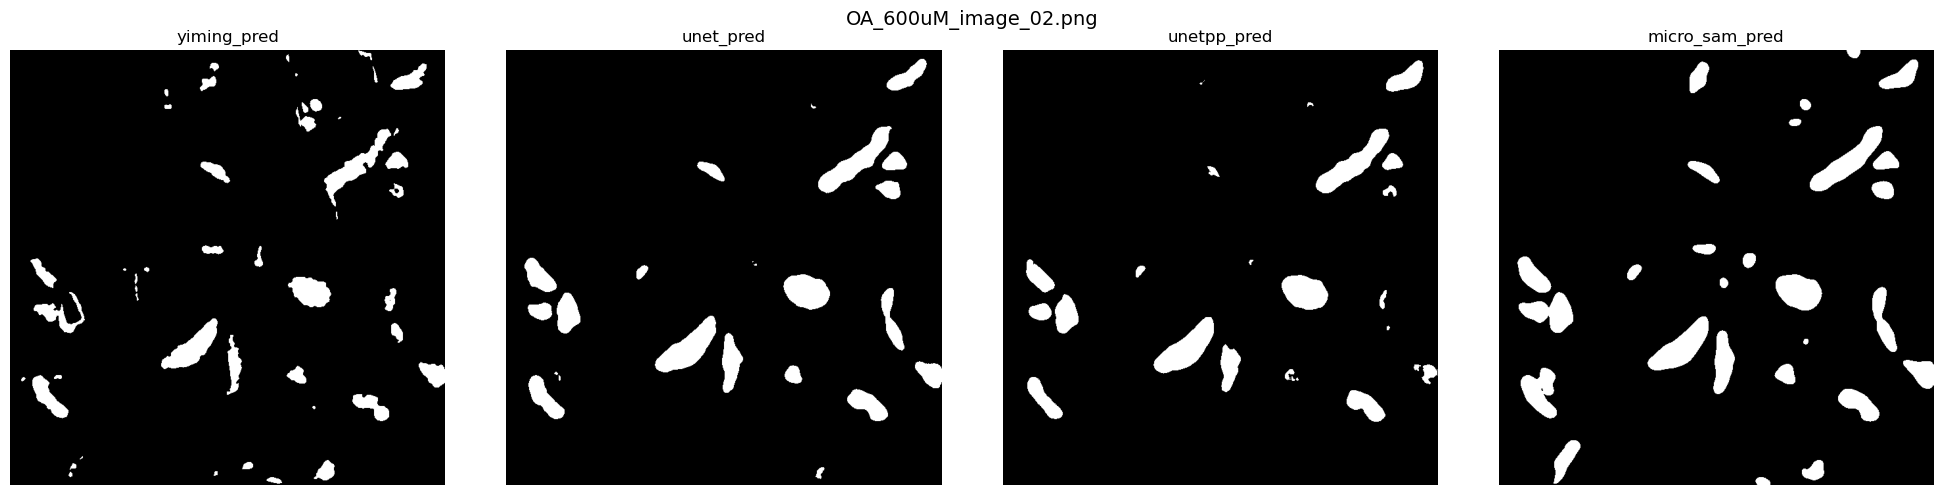

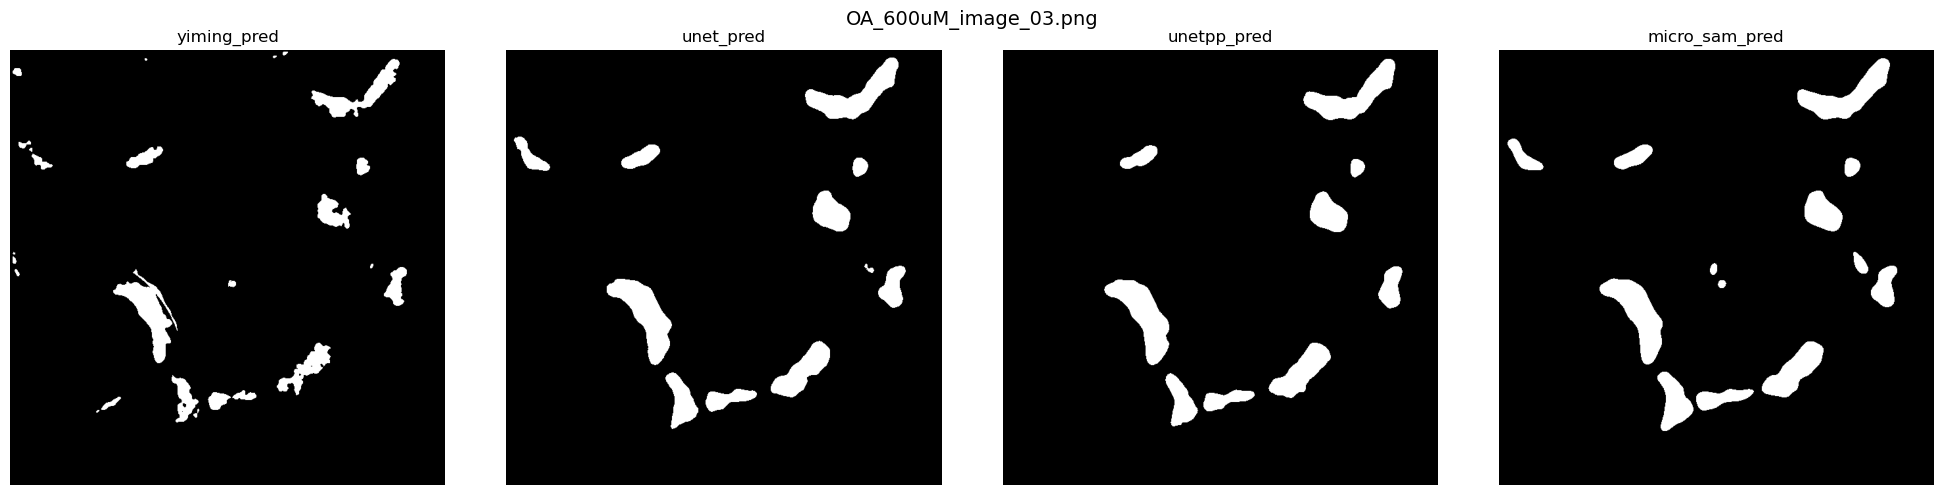

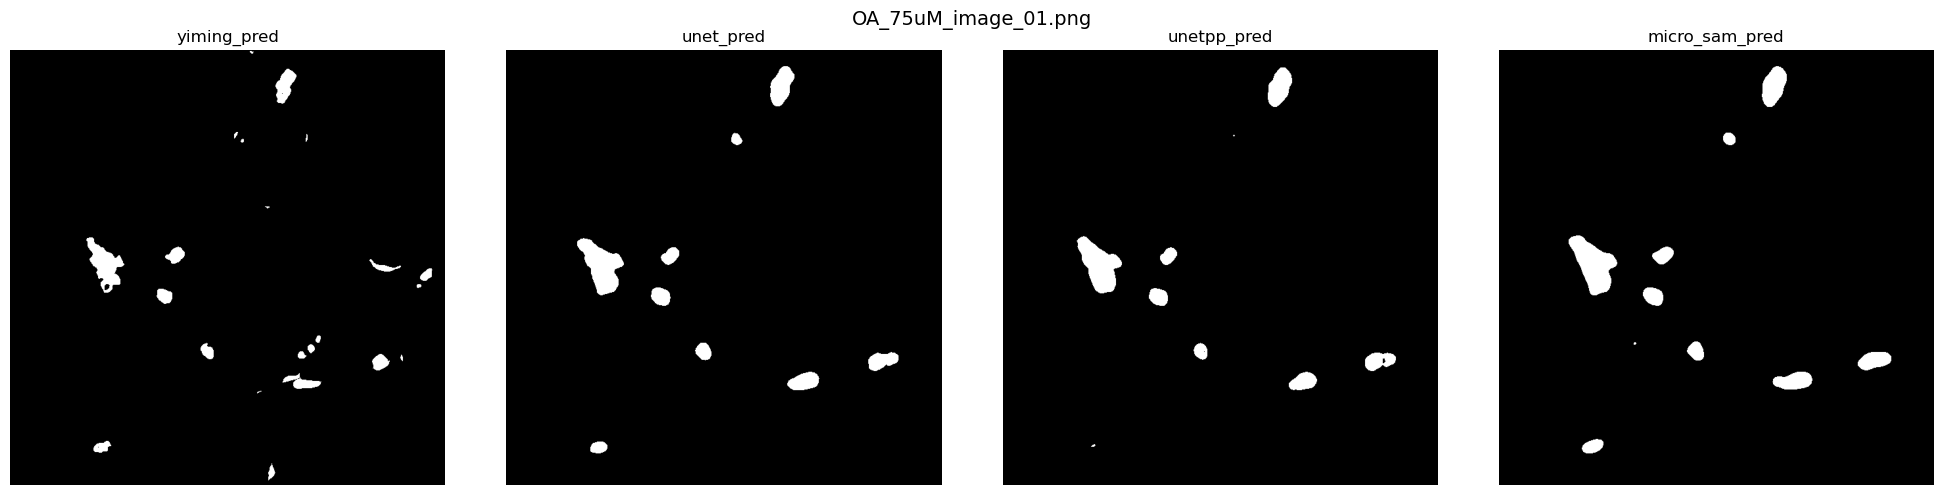

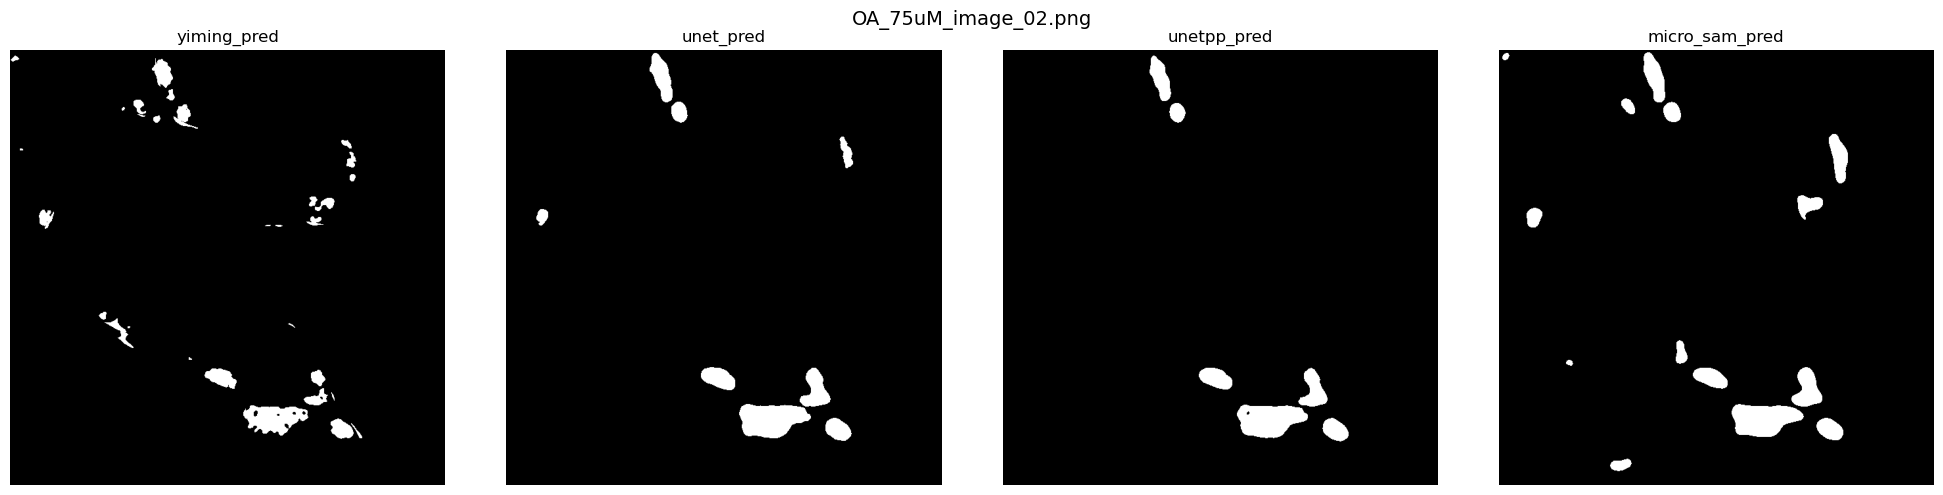

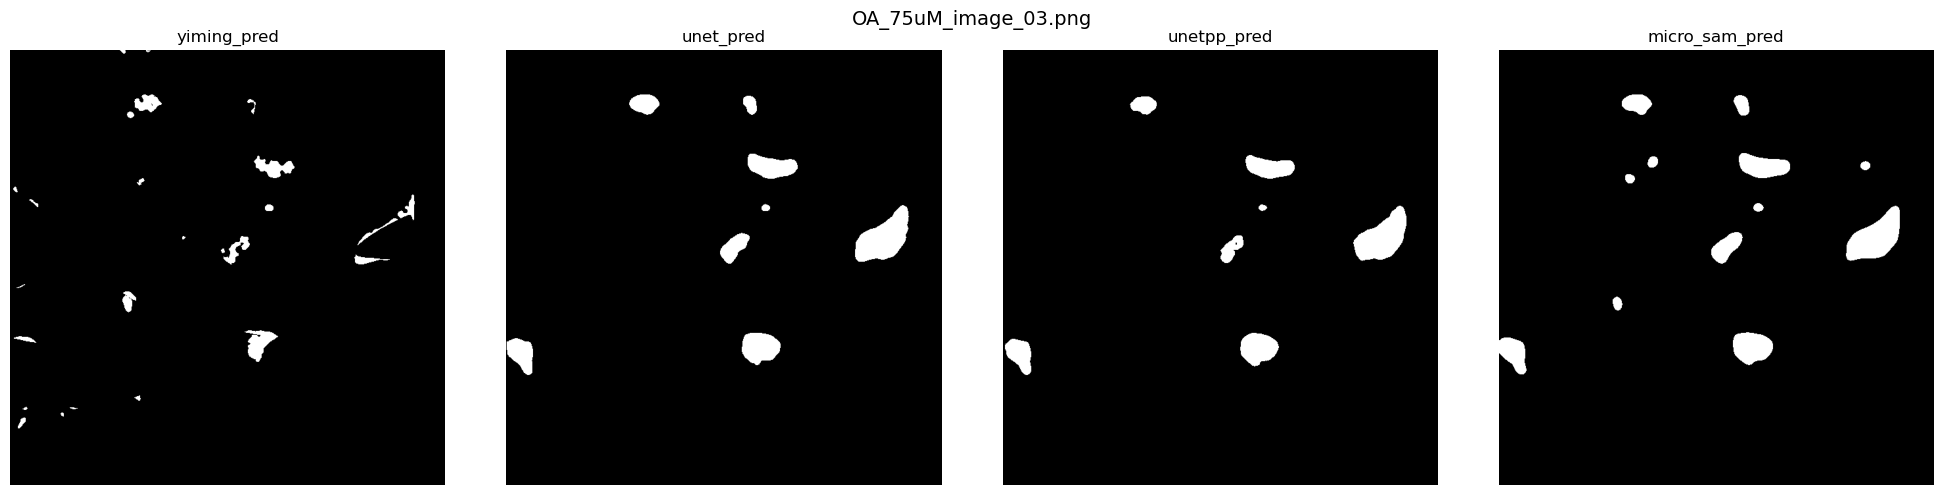

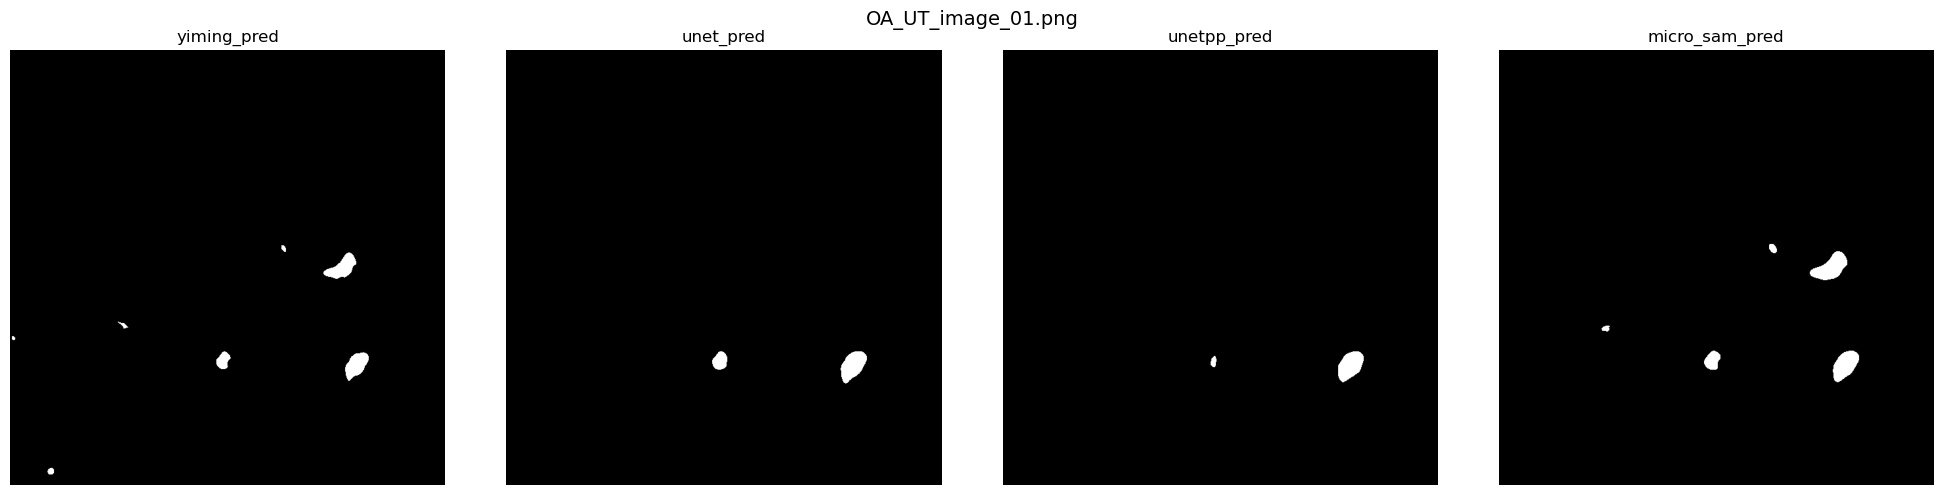

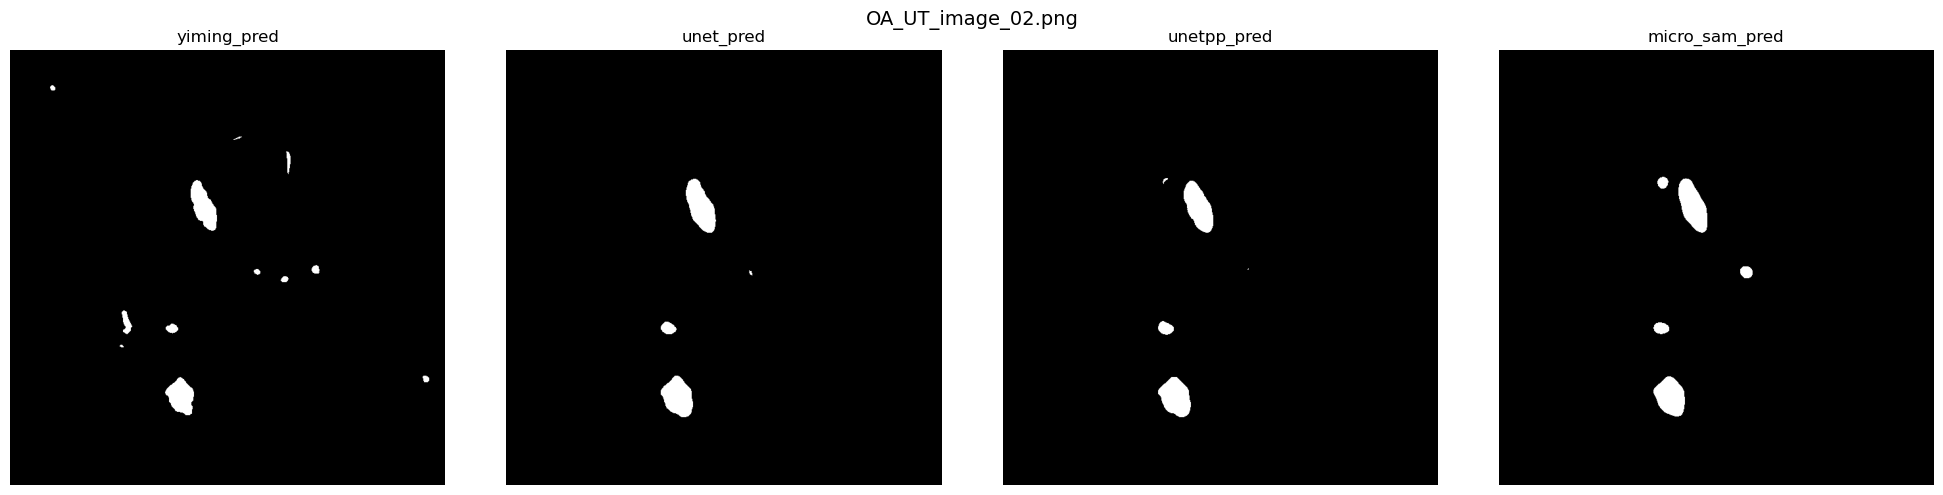

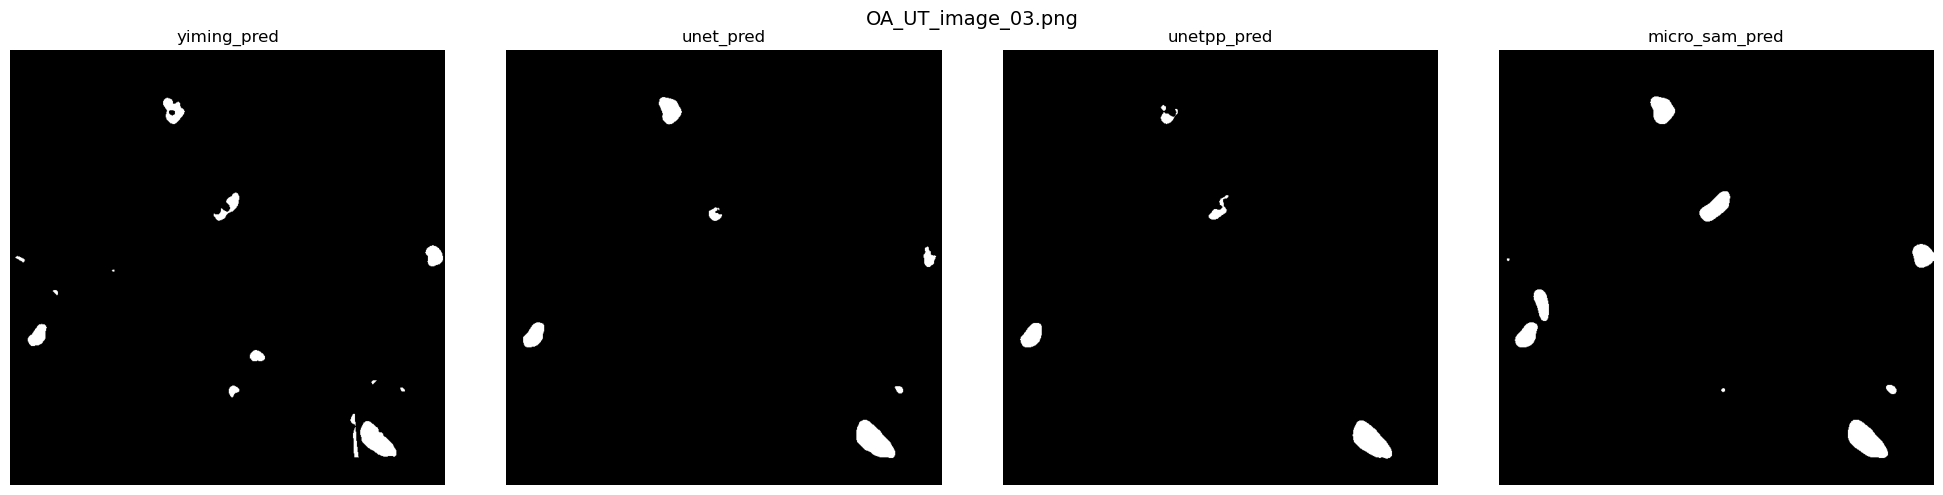

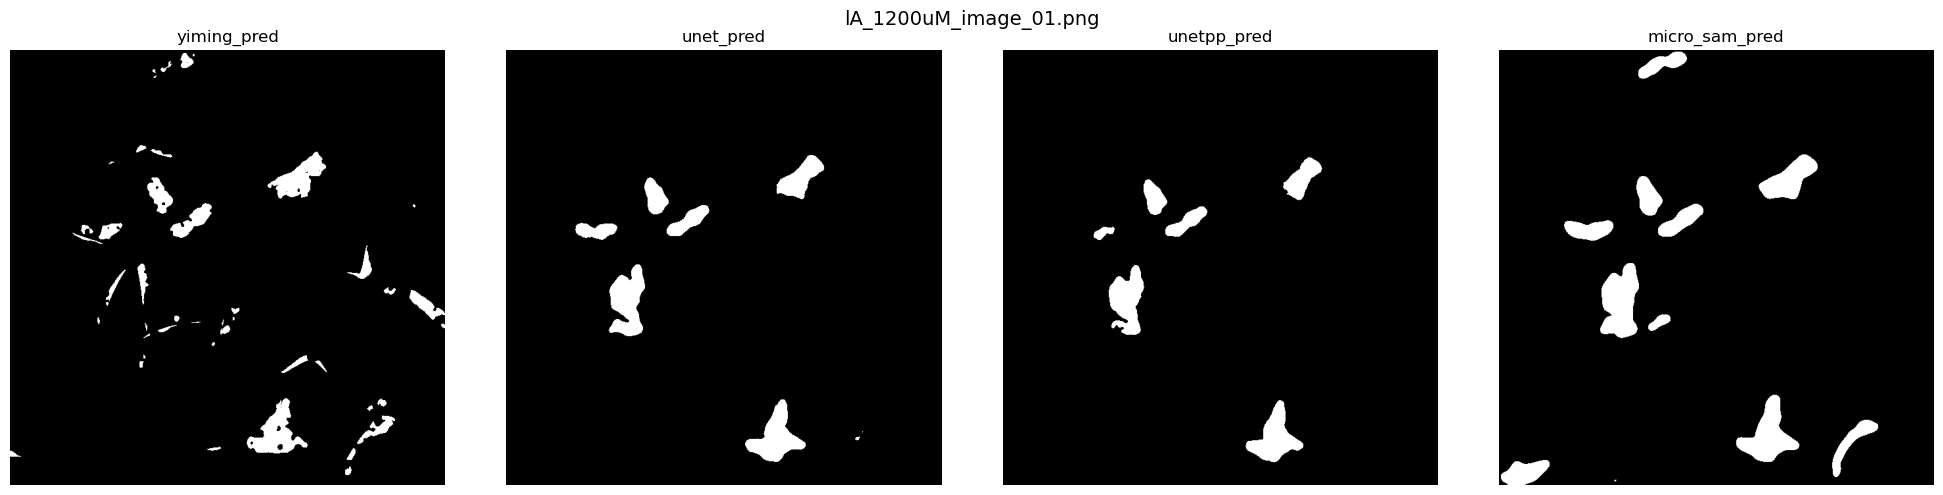

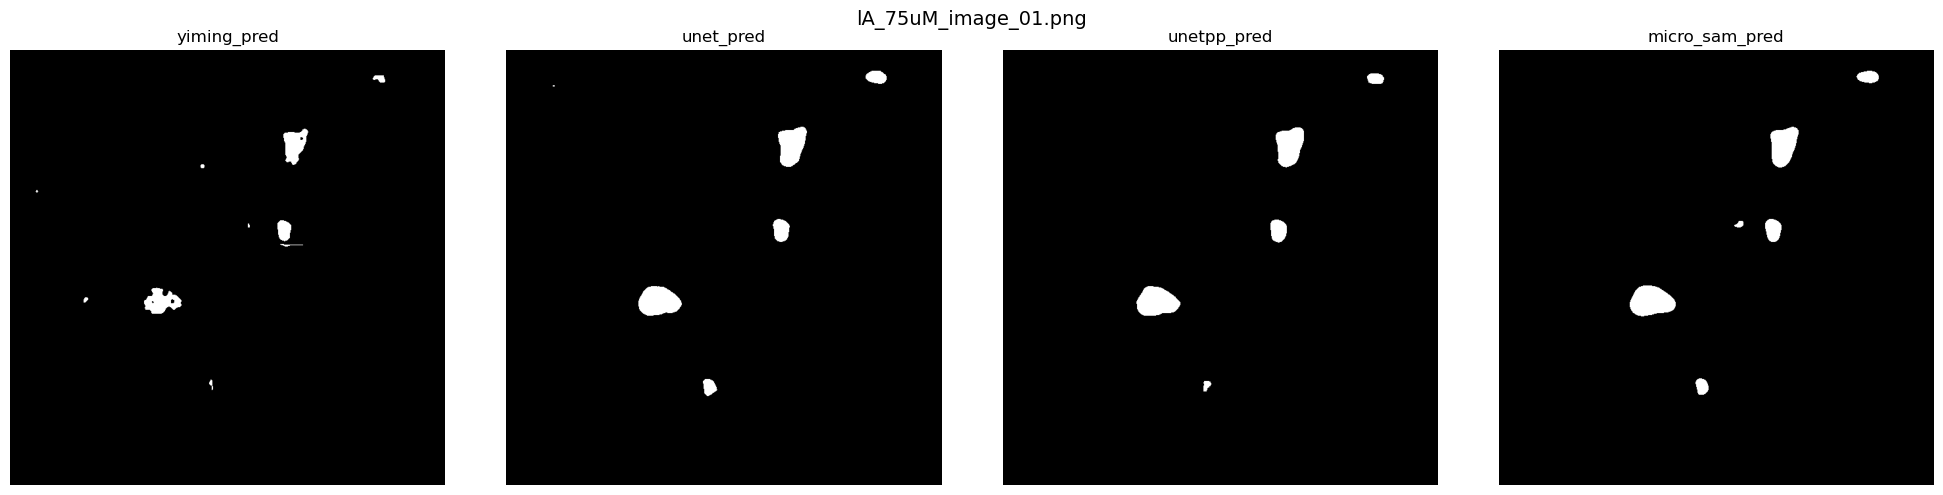

In [8]:
# List of folders to compare
folder_paths = ["../images/yiming_pred", "../images/unet_pred", "../images/unetpp_pred", "../images/micro_sam_pred"]  # Update this with your folder paths

# Ensure all folders have the same image filenames
common_filenames = set(os.listdir(folder_paths[0]))
for folder in folder_paths[1:]:
    common_filenames &= set(os.listdir(folder))
common_filenames = sorted([f for f in common_filenames if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff'))])

print(f"Found {len(common_filenames)} shared images.")

# Function to display one row of same-name masks from all folders
def show_image_rows(filenames, folders):
    for filename in filenames:
        fig, axs = plt.subplots(1, len(folders), figsize=(5 * len(folders), 5))
        for i, folder in enumerate(folders):
            image_path = os.path.join(folder, filename)
            mask = np.array(Image.open(image_path).convert("L"))

            axs[i].imshow(mask, cmap='gray', vmin=0, vmax=255)
            axs[i].set_title(f"{os.path.basename(folder)}", fontsize=12)
            axs[i].axis("off")

        plt.suptitle(f"{filename}", fontsize=14)
        plt.tight_layout()
        plt.show()

# Show all in batches of 1 row (i.e., one shared filename per figure)
show_image_rows(common_filenames, folder_paths)